## Final analysis

In [1]:
import pandas as pd
#all
all_data = pd.read_excel("Data2/קובץ מתכלל כללי.xlsx")

#sviot ratzon
all_data[all_data.columns[41]] = all_data[all_data.columns[41]].apply(lambda x: "כן" if x==0 else "לא")

#heil avir & yom alef
yom_alef_avir = all_data[(all_data["חיל אוויר"]=="כן")&(all_data["יום בשבוע"]=="ראשון")]
#heil avir & yom bet
yom_bet_avir = all_data[(all_data["חיל אוויר"]=="כן")&(all_data["יום בשבוע"]=="שני")]

#else & yom alef
yom_alef_else = all_data[(all_data["חיל אוויר"]=="לא")&(all_data["יום בשבוע"]=="ראשון")]

#else & yom bet
yom_bet_else = all_data[(all_data["חיל אוויר"]=="לא")&(all_data["יום בשבוע"]=="שני")]

In [2]:
all_data.dtypes

חותמת זמן                                                                             datetime64[ns]
מהו מגדרך?                                                                                    object
מהו סוג שירותך?                                                                               object
מהו מקום המגורים שלך?                                                                         object
מהו הבסיס אליו אתה מגיע?                                                                      object
מהו מתחם ההסעה בו אתה נמצא כעת?                                                               object
מהי תדירות יציאותיך מהבסיס?                                                                   object
מדוע הגעת לתחנה זו היום? (ניתן לסמן יותר מתשובה אחת)                                          object
באיזו שעה הוגדר לך להגיע לבסיס היום?                                                          object
באיזו שעה אתה מעריך שתגיע לבסיס היום?                                                      

In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960 entries, 0 to 1959
Data columns (total 46 columns):
 #   Column                                                                              Non-Null Count  Dtype         
---  ------                                                                              --------------  -----         
 0   חותמת זמן                                                                           1960 non-null   datetime64[ns]
 1   מהו מגדרך?                                                                          1960 non-null   object        
 2   מהו סוג שירותך?                                                                     1960 non-null   object        
 3   מהו מקום המגורים שלך?                                                               1953 non-null   object        
 4   מהו הבסיס אליו אתה מגיע?                                                            1930 non-null   object        
 5   מהו מתחם ההסעה בו אתה נמצא כעת?                 

In [4]:
import matplotlib.pyplot as plt
def four_plot_nominal(column_number = None, plot_color = 'teal', text_color = 'cyan'):
    """
    four graph for numinal objects
    """
    plt.style.use('ggplot')
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    fig.suptitle(all_data.columns[column_number][::-1], size = 20)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    #יום א יחידות צהל ללא חיל אויר
    labels = [label[::-1] for label in yom_alef_else[yom_alef_else.columns[column_number]].value_counts().index.tolist()]
    ax1.bar(labels,yom_alef_else[all_data.columns[column_number]].value_counts(), color = plot_color)
    ax1.set_title("יחידות צהל ללא חיל אויר יום א"[::-1])
    
    for j in range(len(yom_alef_else[yom_alef_else.columns[column_number]].value_counts())):
        txt = f"{round(yom_alef_else[yom_alef_else.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax1.text(j, yom_alef_else[yom_alef_else.columns[column_number]].value_counts()[j]+5,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))

    #יום ב יחידות צהל ללא חיל אויר
    labels = [label[::-1] for label in yom_bet_else[yom_bet_else.columns[column_number]].value_counts().index.tolist()]
    ax2.bar(labels,yom_bet_else[yom_bet_else.columns[column_number]].value_counts(), color = plot_color)
    ax2.set_title("יחידות צהל ללא חיל אויר יום ב"[::-1])
    ax2.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_bet_else[yom_bet_else.columns[column_number]].value_counts())):
        txt = f"{round(yom_bet_else[yom_bet_else.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax2.text(j, yom_bet_else[yom_bet_else.columns[column_number]].value_counts()[j],txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))

    #חיל אוויר יום א
    labels = [label[::-1] for label in yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts().index.tolist()]
    ax3.bar(labels,yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts(), color = plot_color)
    ax3.set_title("חיל אויר יום א"[::-1])
    ax3.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts())):
        txt = f"{round(yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax3.text(j, yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts()[j],txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))

    #חיל אוויר יום ב
    labels = [label[::-1] for label in yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts().index.tolist()]
    ax4.bar(labels,yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts(), color = plot_color)
    ax4.set_title("חיל אויר יום ב"[::-1])
    ax4.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts())):
        txt = f"{round(yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax4.text(j, yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts()[j]-1,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))
    
def all_plot_nominal(column_number = None, plot_color = 'teal', text_color = 'cyan'):
    plt.figure(figsize = (8,5))
    labels = [label[::-1] for label in all_data[all_data.columns[column_number]].value_counts().index.tolist()]
    plt.bar(labels,all_data[all_data.columns[column_number]].value_counts(), color = plot_color)
    for j in range(len(all_data[all_data.columns[column_number]].value_counts())):
        txt = f"{round(all_data[all_data.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        plt.text(j, all_data[all_data.columns[column_number]].value_counts()[j]+5,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
    plt.title(all_data.columns[column_number][::-1])
    plt.show()
    
def four_plot_nominal2(column_number = None, n= 10,height = 10, width = 10, plot_color = 'teal', text_color = 'cyan'):
    """
    four graph for numinal objects
    """
    plt.style.use('ggplot')
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    fig.set_figheight(height)
    fig.set_figwidth(width)
    fig.suptitle(all_data.columns[column_number][::-1], size = 20)

    #יום א יחידות צהל ללא חיל אויר
    labels = [label[::-1] for label in yom_alef_else[yom_alef_else.columns[column_number]].value_counts().index.tolist()[:n]]
    ax1.bar(labels,yom_alef_else[all_data.columns[column_number]].value_counts()[:n], color = plot_color)
    ax1.set_xticklabels(labels,rotation=45)
    ax1.set_title("יחידות צהל ללא חיל אויר יום א"[::-1])
    ax1.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_alef_else[yom_alef_else.columns[column_number]].value_counts()[:n])):
        txt = f"{round(yom_alef_else[yom_alef_else.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax1.text(j, yom_alef_else[yom_alef_else.columns[column_number]].value_counts()[j]+1,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))

    #יום ב יחידות צהל ללא חיל אויר
    labels = [label[::-1] for label in yom_bet_else[yom_bet_else.columns[column_number]].value_counts().index.tolist()[:n]]
    ax2.bar(labels,yom_bet_else[yom_bet_else.columns[column_number]].value_counts()[:n], color = plot_color)
    ax2.set_xticklabels(labels,rotation=45)
    ax2.set_title("יחידות צהל ללא חיל אויר יום ב"[::-1])
    ax2.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_bet_else[yom_bet_else.columns[column_number]].value_counts()[:n])):
        txt = f"{round(yom_bet_else[yom_bet_else.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax2.text(j, yom_bet_else[yom_bet_else.columns[column_number]].value_counts()[j],txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))

    #חיל אוויר יום א
    labels = [label[::-1] for label in yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts().index.tolist()[:n]]
    ax3.bar(labels,yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts()[:n], color = plot_color)
    ax3.set_xticklabels(labels,rotation=45)
    ax3.set_title("חיל אויר יום א"[::-1])
    ax3.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts()[:n])):
        txt = f"{round(yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax3.text(j, yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts()[j],txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))

    #חיל אוויר יום ב
    labels = [label[::-1] for label in yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts().index.tolist()[:n]]
    ax4.bar(labels,yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts()[:n], color = plot_color)
    ax4.set_xticklabels(labels,rotation=45)
    ax4.set_title("חיל אויר יום ב"[::-1])
    ax4.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts()[:n])):
        txt = f"{round(yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax4.text(j, yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts()[j]-1,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))
    
def all_plot_nominal2(column_number = None,n = 10, plot_color = 'teal', text_color = 'cyan'):
    plt.figure(figsize = (20,5))
    labels = [label[::-1] for label in all_data[all_data.columns[column_number]].value_counts().index.tolist()[:n]]
    plt.bar(labels,all_data[all_data.columns[column_number]].value_counts()[:n], color = plot_color)
    
    for j in range(len(all_data[all_data.columns[column_number]].value_counts()[:n])):
        txt = f"{round(all_data[all_data.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        plt.text(j, all_data[all_data.columns[column_number]].value_counts()[j]+1,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
    plt.title(all_data.columns[column_number][::-1])
    plt.show()
#for ax in fig.get_axes():
    #ax.label_outer()
    
def all_plot_nominal3(column_number = None,n = 10, plot_color = 'teal', text_color = 'cyan'):
    plt.figure(figsize = (20,5))
    labels = [label[::-1] for label in all_data[all_data.columns[column_number]].value_counts().index.tolist()[:n]]
    plt.bar(labels,all_data[all_data.columns[column_number]].value_counts()[:n], color = plot_color)

    for j in range(len(all_data[all_data.columns[column_number]].value_counts()[:n])):
        txt = f"{round(all_data[all_data.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        plt.text(j, all_data[all_data.columns[column_number]].value_counts()[j]+1,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
    plt.title(all_data.columns[column_number][::-1])
    plt.xticks(rotation=90,size = 14)
    plt.show()

# מגדר

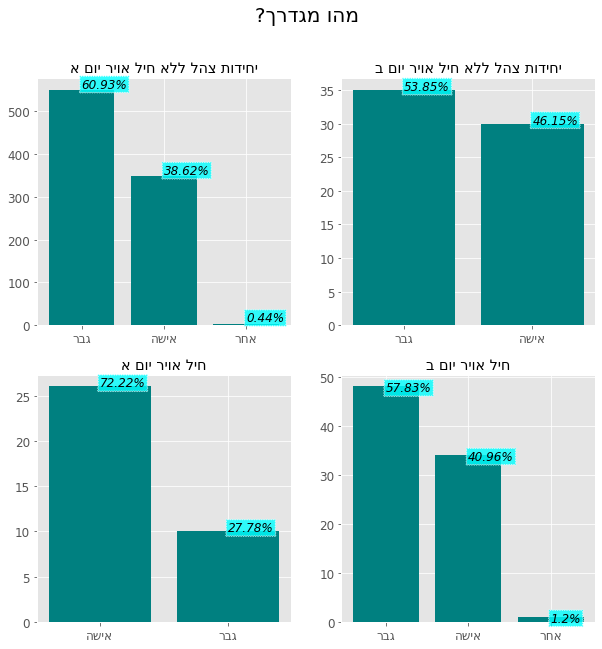

In [5]:
four_plot_nominal(1)

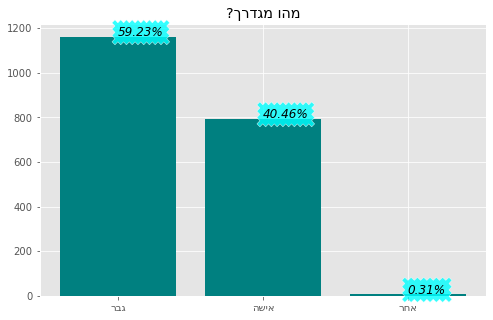

In [6]:
all_plot_nominal(1)

# סוג שירות

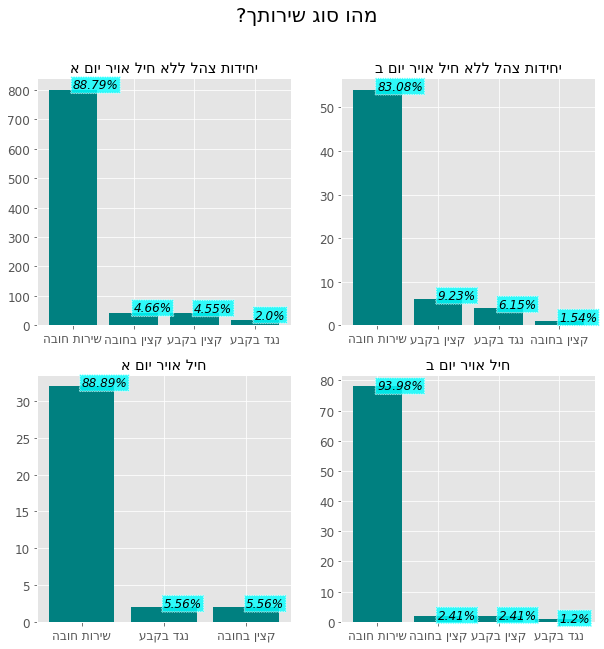

In [7]:
four_plot_nominal(2)

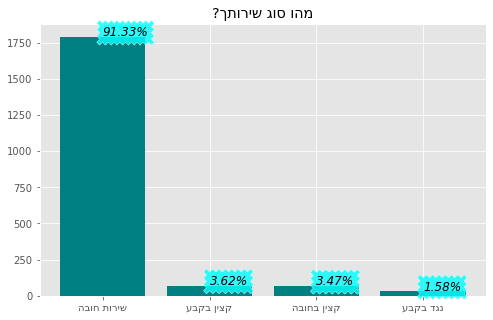

In [8]:
all_plot_nominal(2)

# מקום מגורים

C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


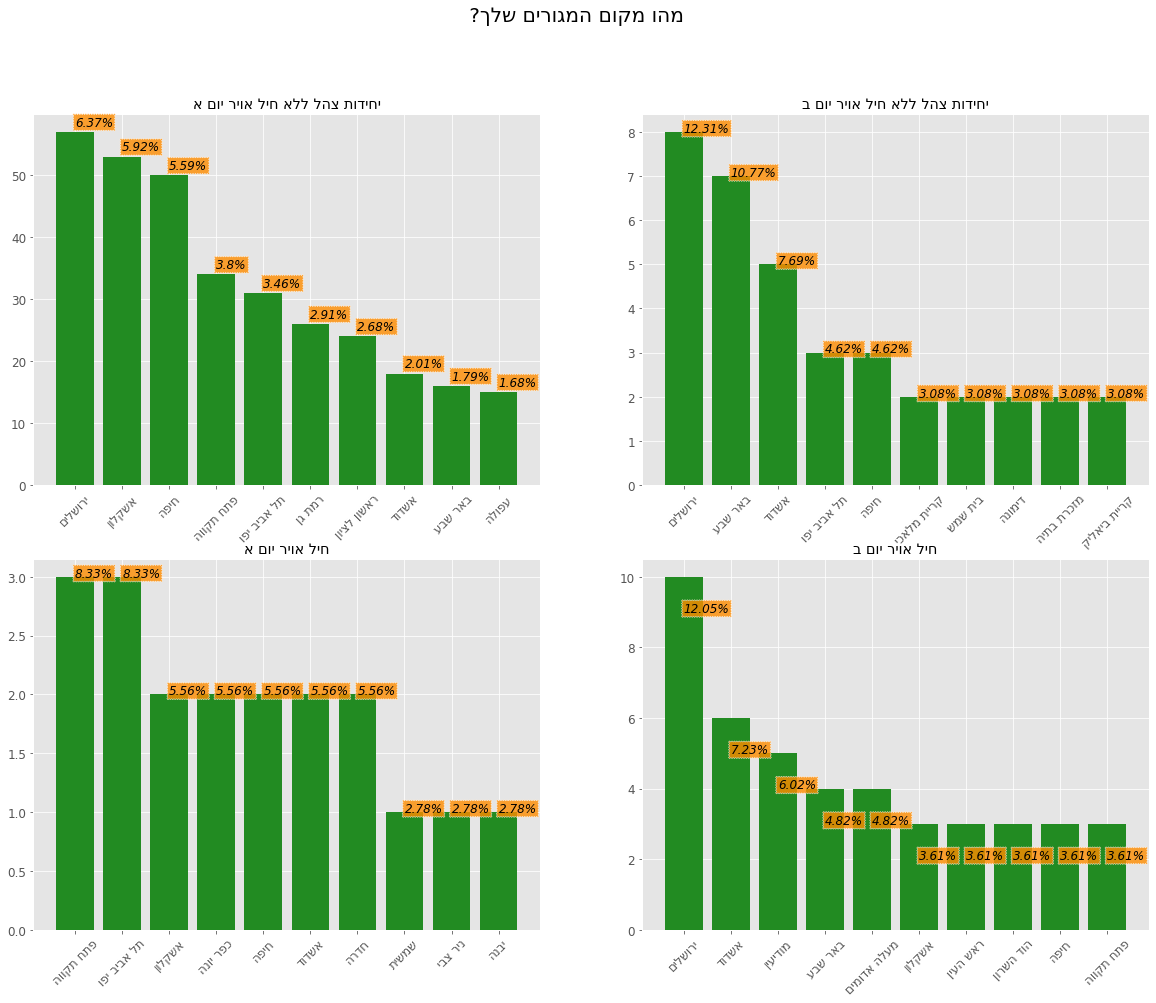

In [9]:
four_plot_nominal2(3,height = 15,width = 20,plot_color = 'forestgreen',text_color ='darkorange')

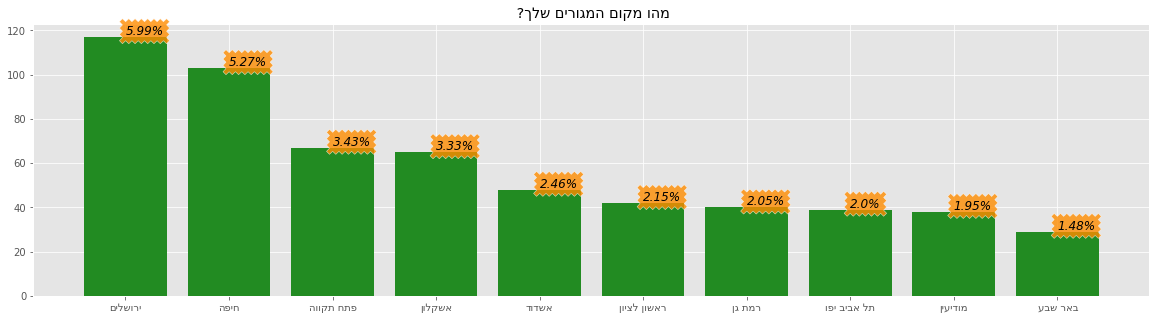

In [10]:
all_plot_nominal2(3,10,plot_color = 'forestgreen',text_color ='darkorange')

# בסיס

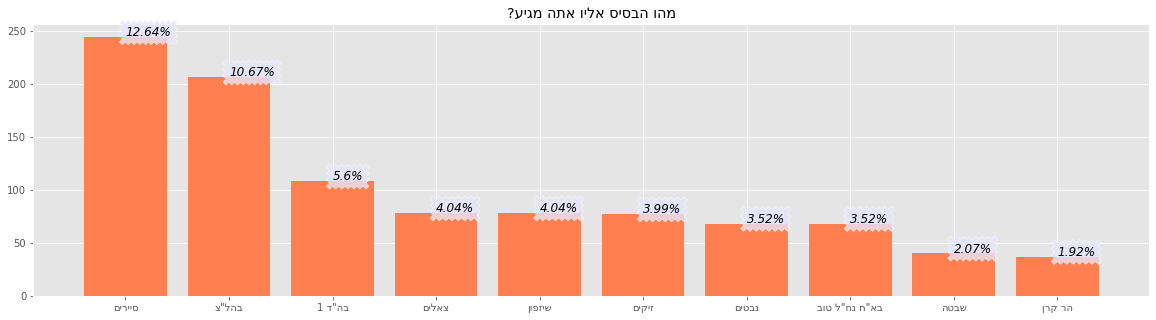

In [11]:
all_plot_nominal2(4,plot_color = 'coral',text_color ='lavender')

C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


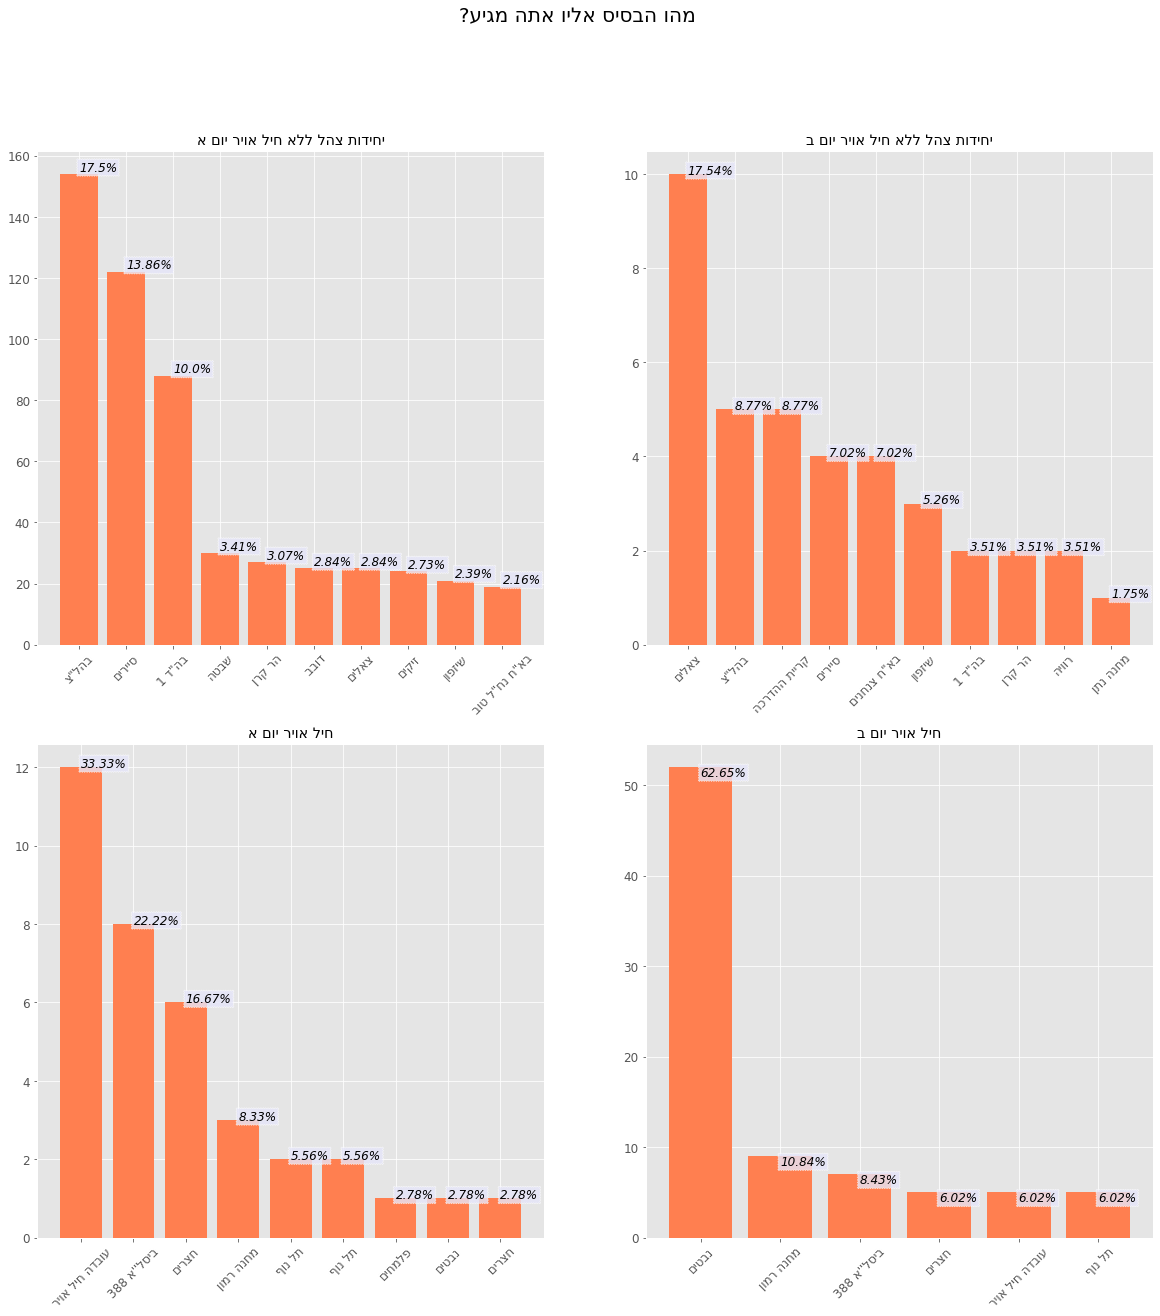

In [12]:
four_plot_nominal2(4,10,20,20,plot_color = 'coral',text_color ='lavender')

# מתחם הסעה

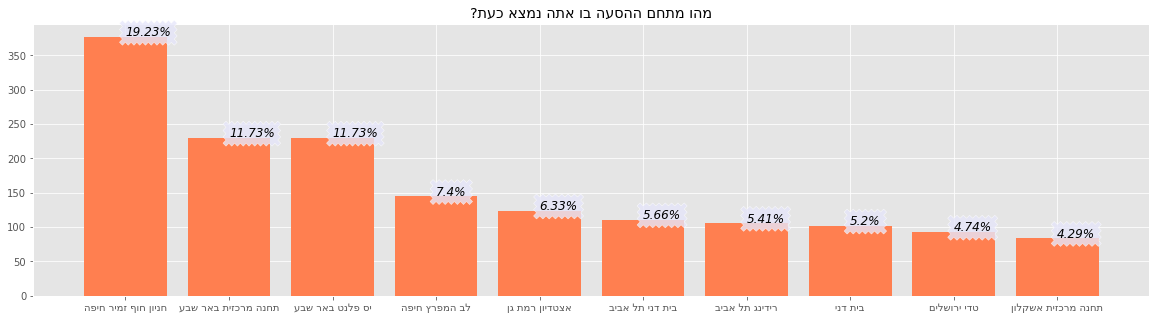

In [13]:
all_plot_nominal2(5,plot_color = 'coral',text_color ='lavender')

C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


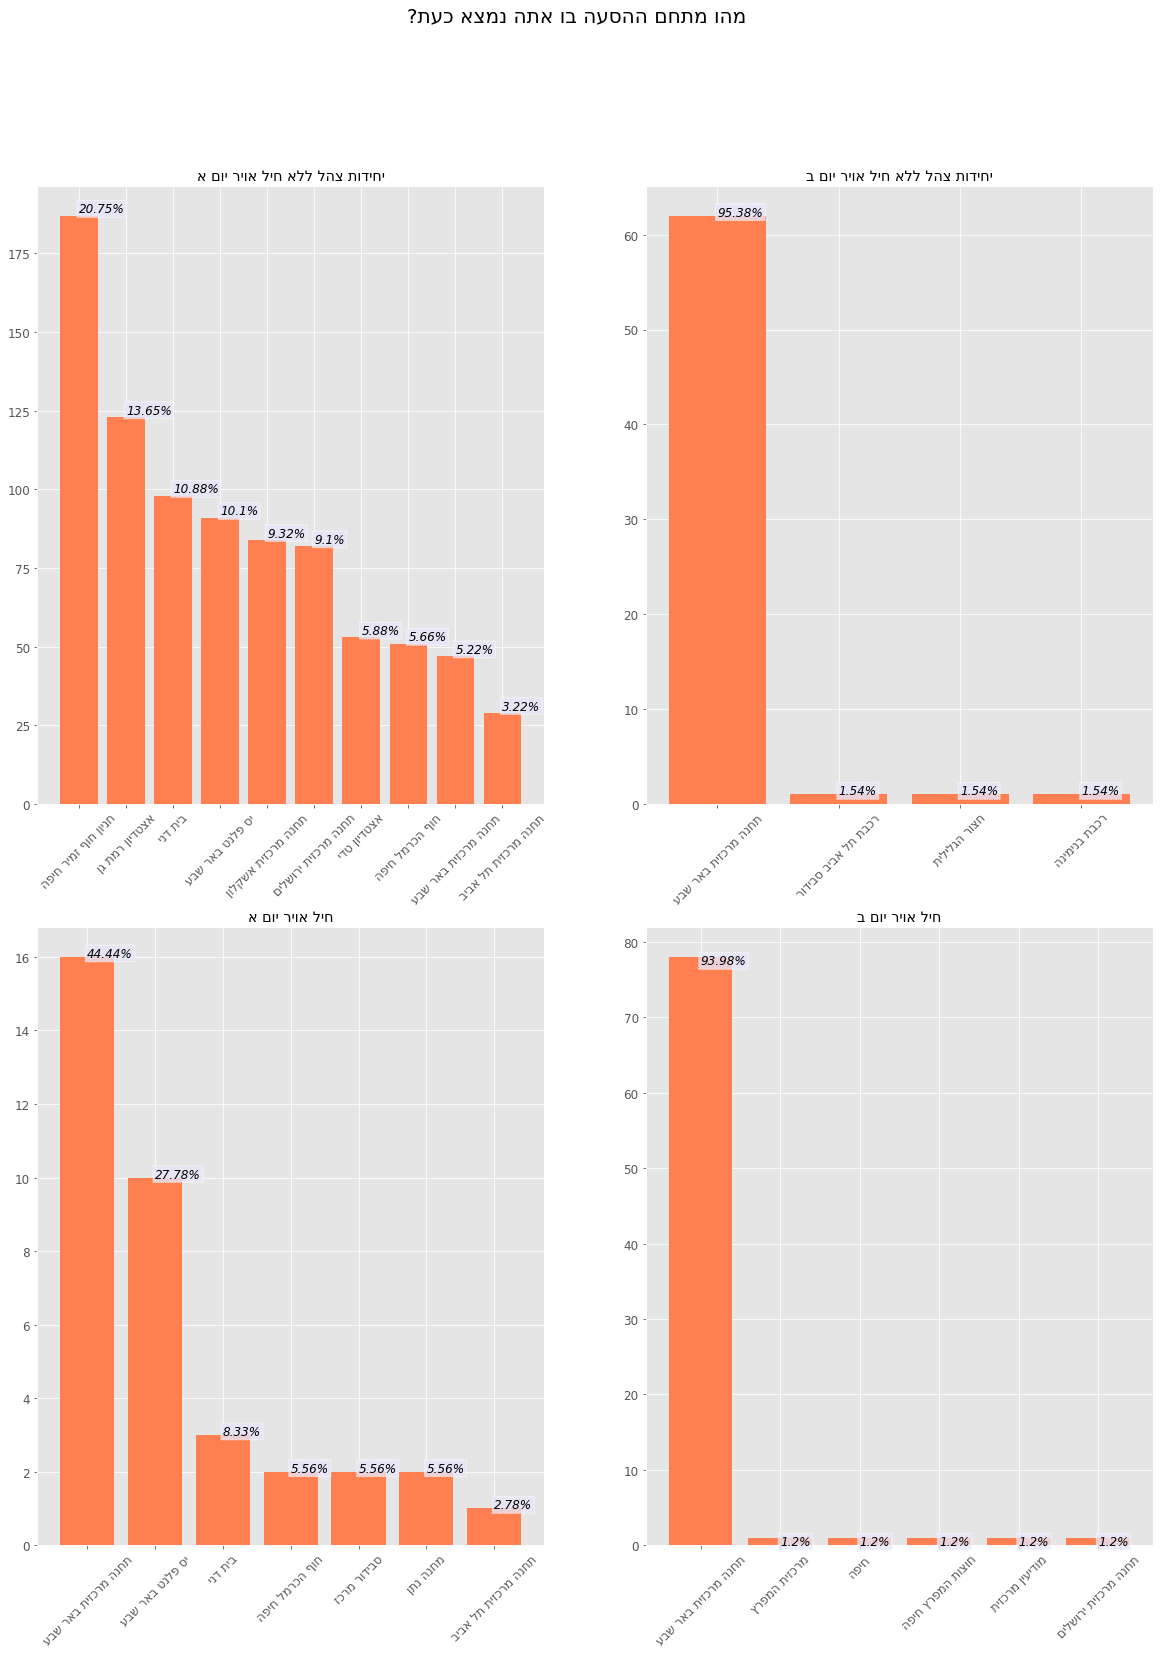

In [14]:
four_plot_nominal2(5,height = 25,width = 20,plot_color = 'coral',text_color ='lavender')

# תדירות יציאות מהבסיס

C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


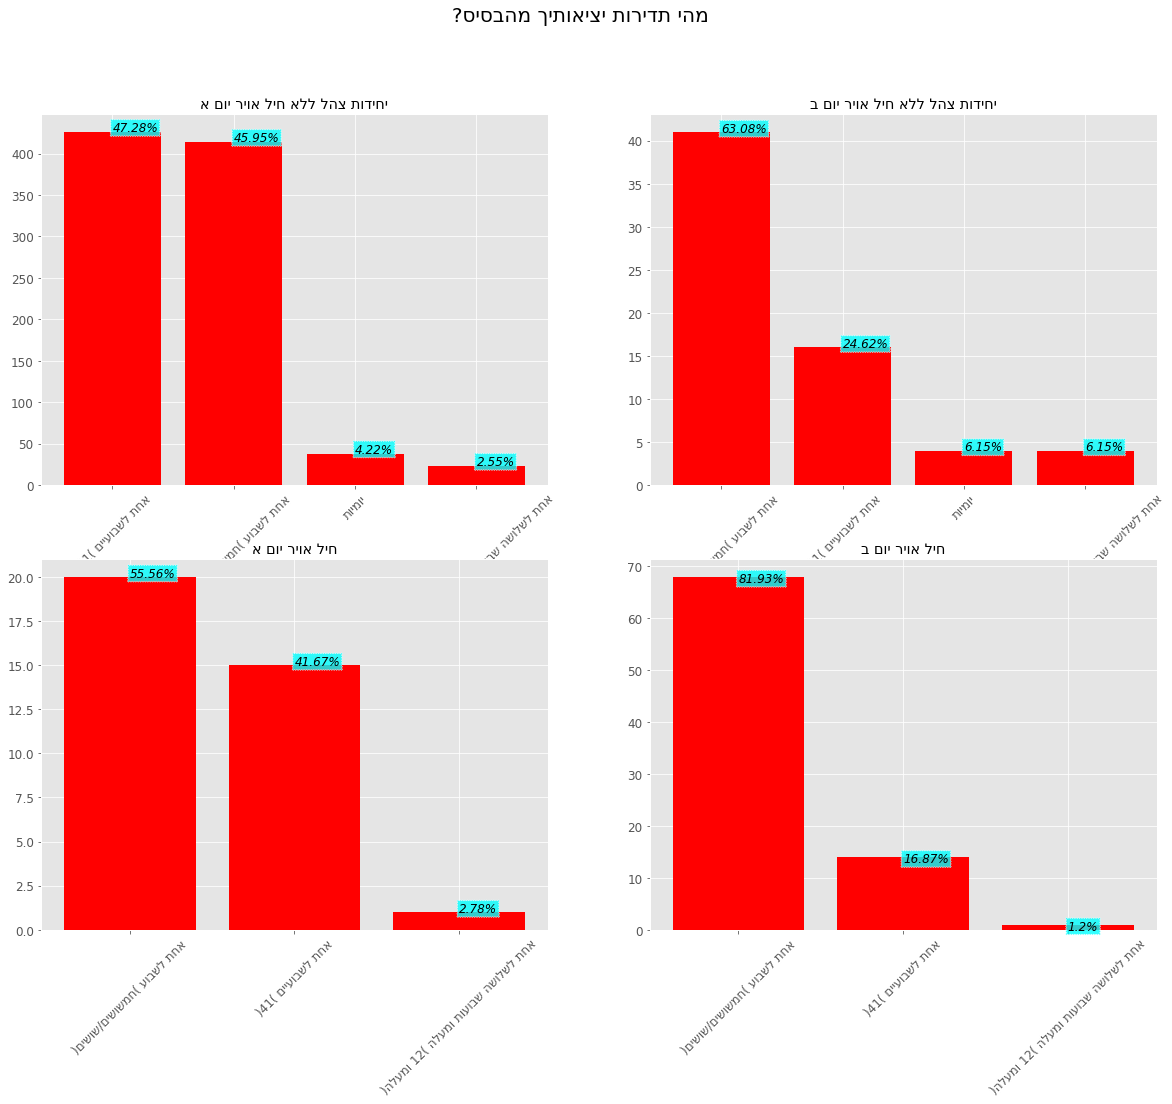

In [15]:
#a
four_plot_nominal2(6,4,15,20,'red','cyan')

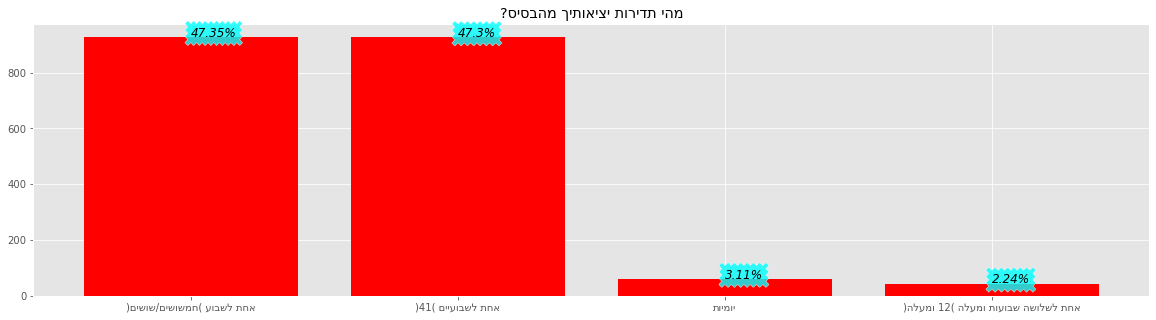

In [16]:
all_plot_nominal2(6,4,'red','cyan')

# סיבת הגעה לתחנה

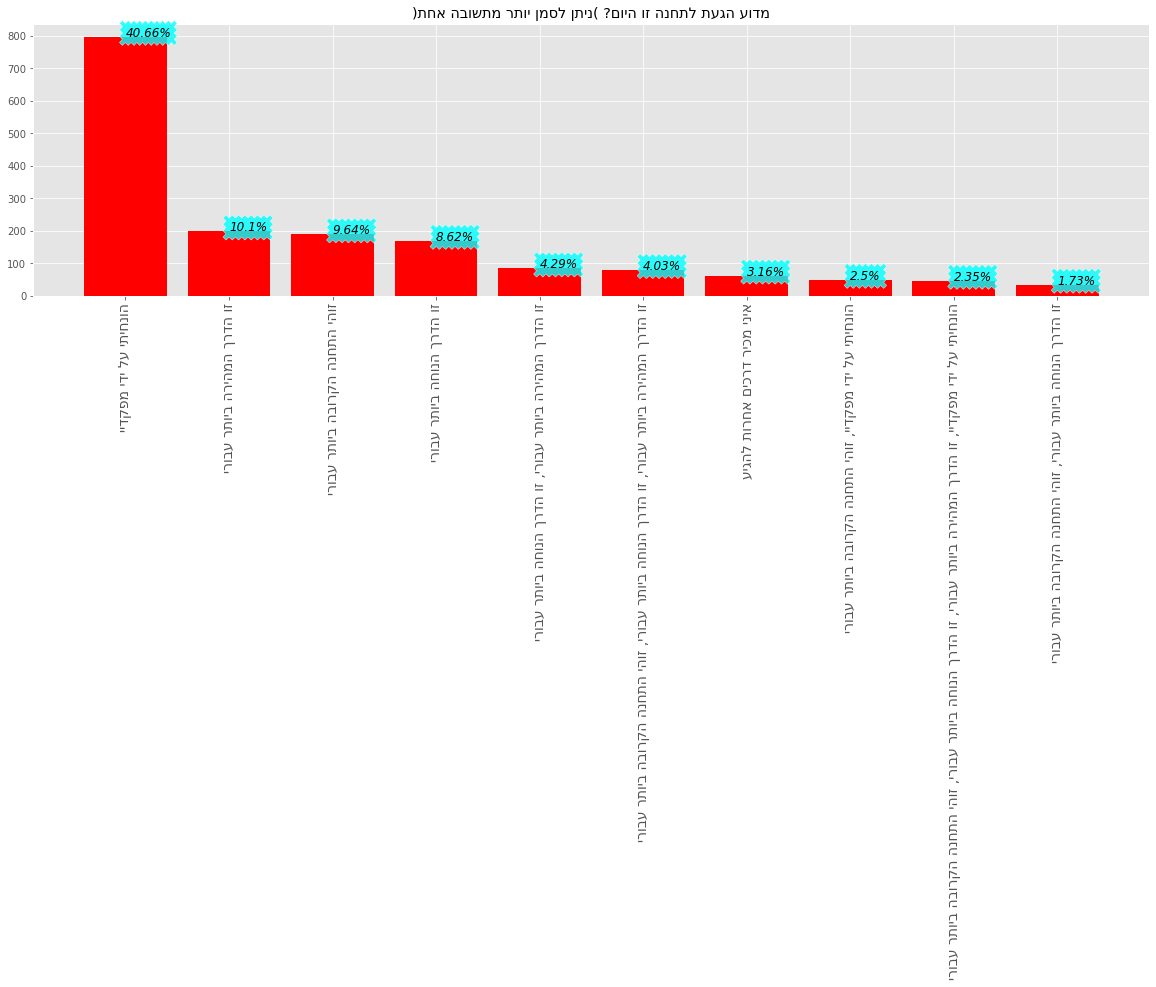

In [17]:
all_plot_nominal3(7,10,'red','cyan')

C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


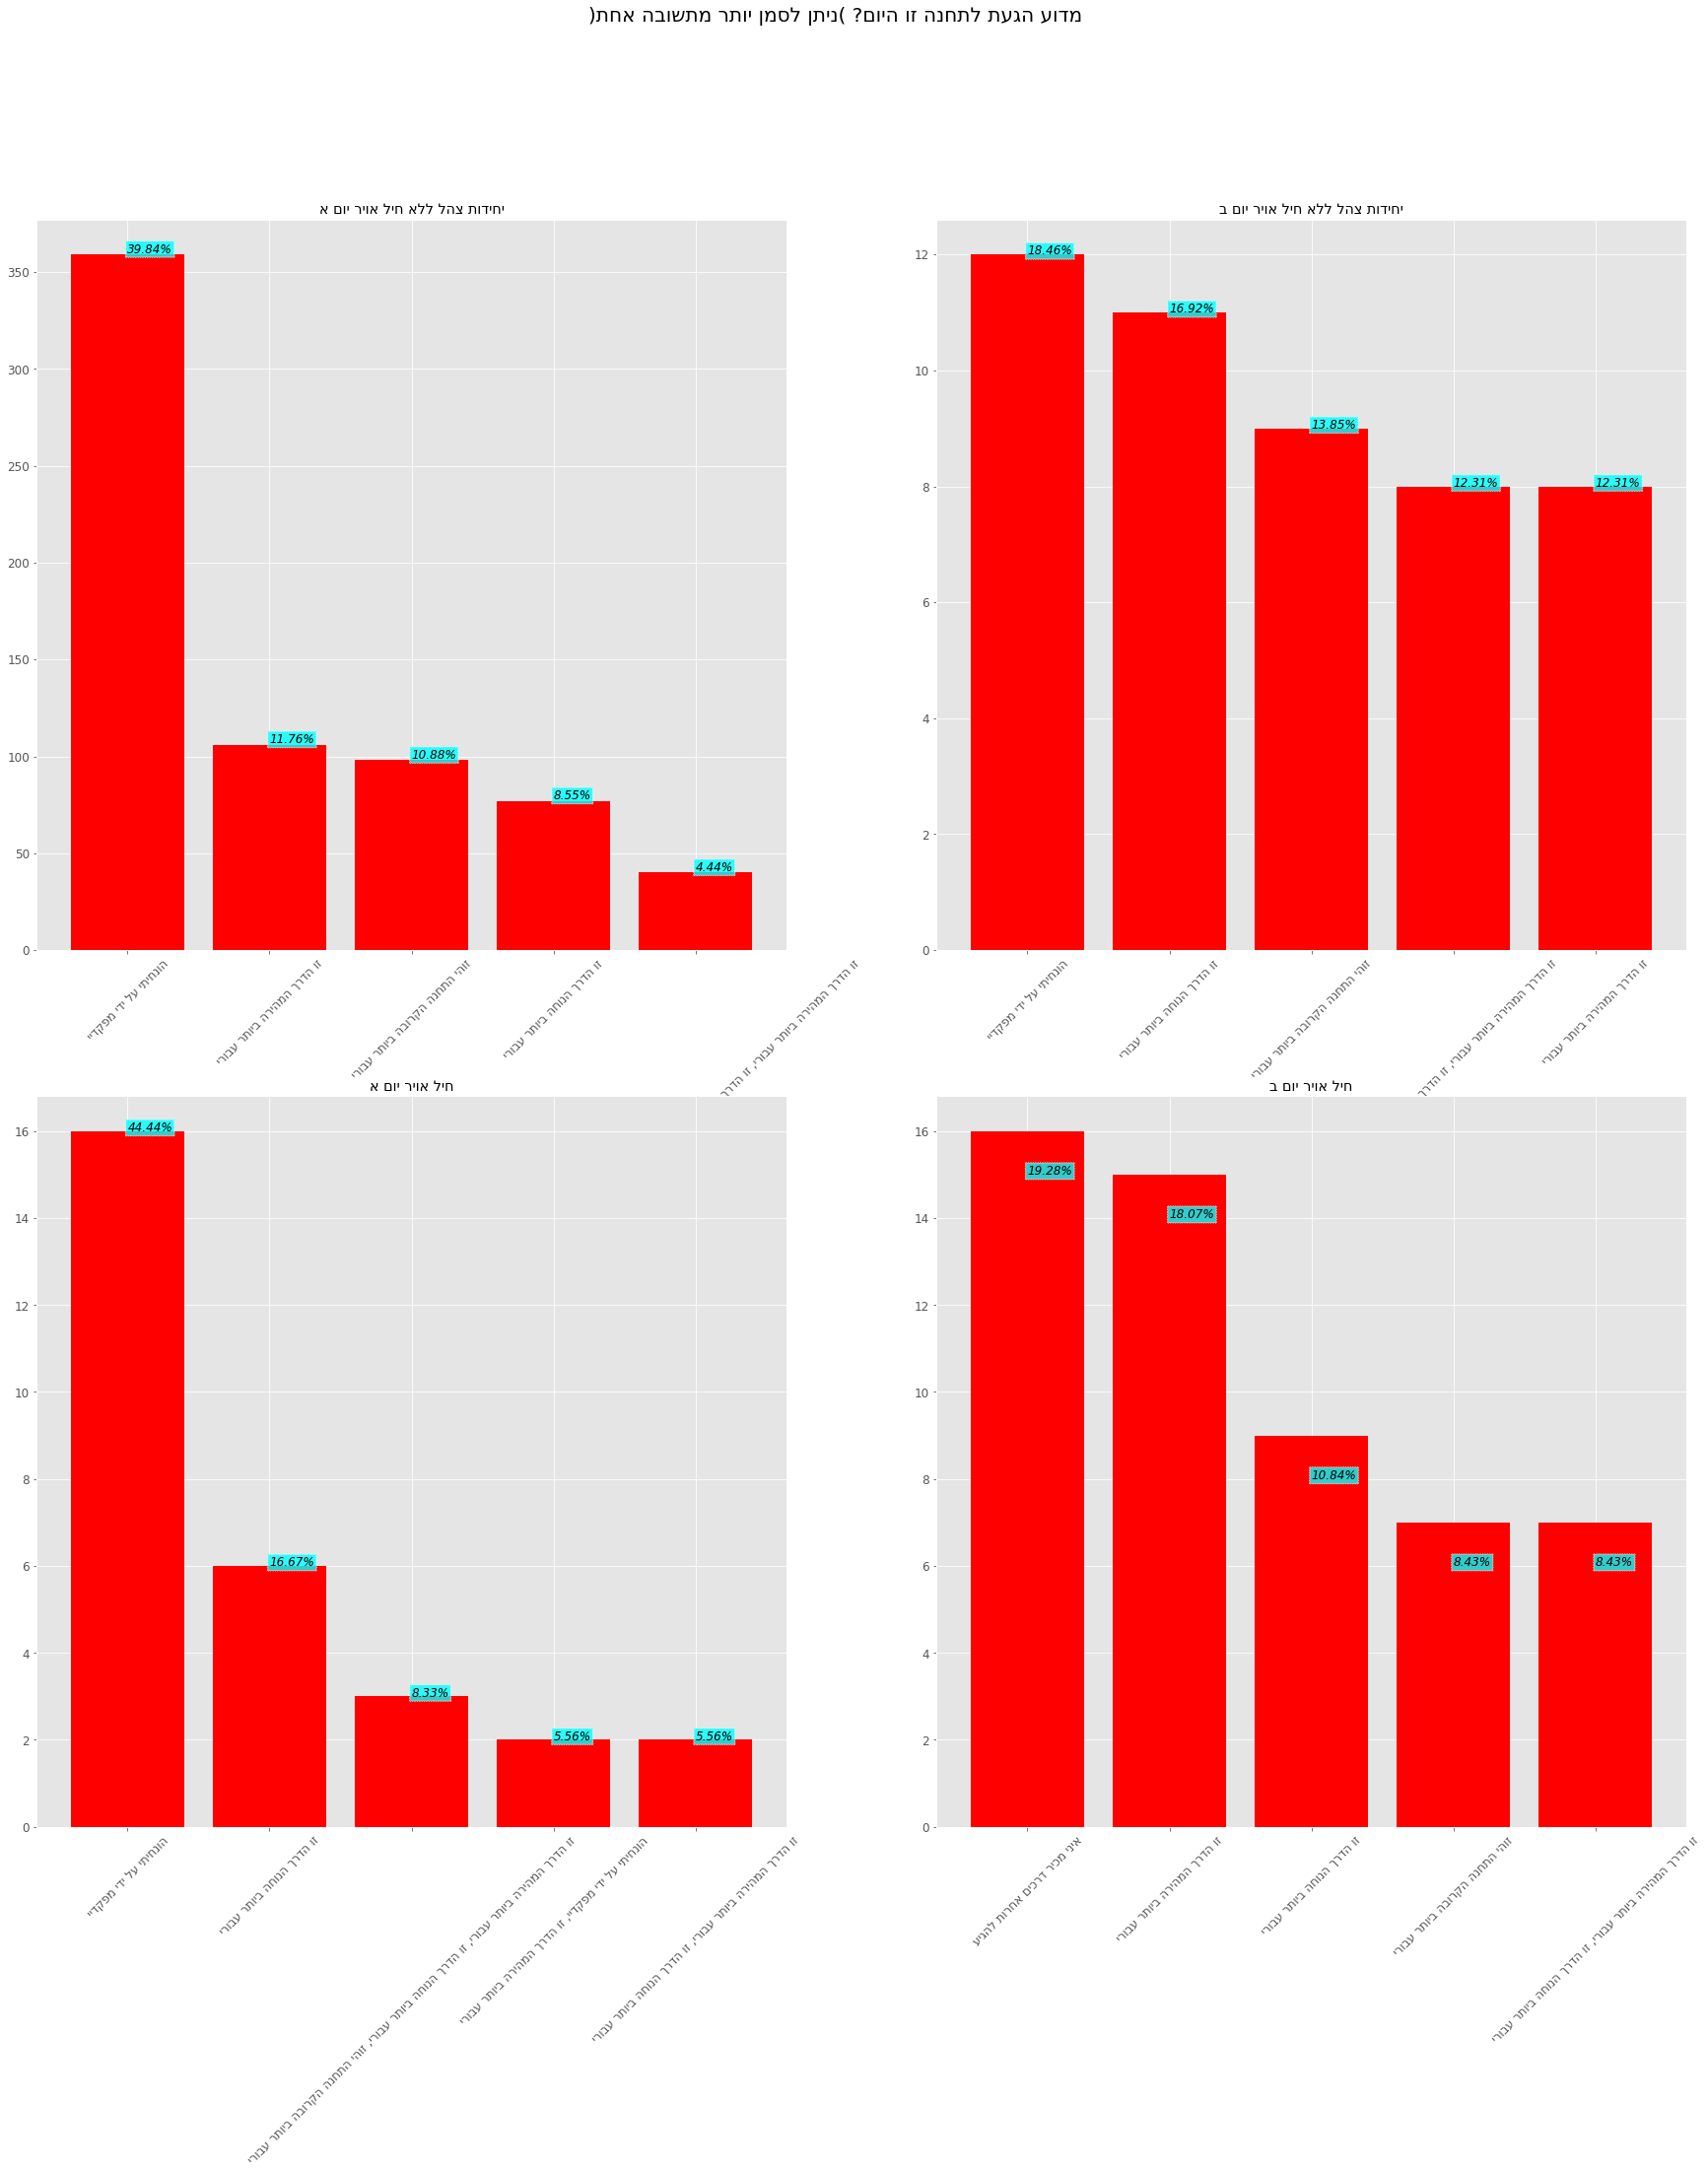

In [18]:
four_plot_nominal2(7,5,30,30,'red','cyan')

#  הצלבה בין שביעות רצון שאט"ל לבין חניון 

In [19]:
df = all_data.groupby(by = all_data.columns[5]).agg(['count','mean']).iloc[:,8:10]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?  \
                                                                             count   
מהו מתחם ההסעה בו אתה נמצא כעת?                                                      
חניון חוף זמיר חיפה                                                            119   
יס פלנט באר שבע                                                                101   
אצטדיון רמת גן                                                                  69   
לב המפרץ חיפה                                                                   48   
רידינג תל אביב                                                                  42   
טדי ירושלים                                                                     41   
תחנה מרכזית באר שבע                                                             39   
בית דני                                                                         34   
בית דני תל אביב                                                                 22   
אצטדיון טדי                                                                     14   

                                           
                                     mean  
מהו מתחם ההסעה בו אתה נמצא כעת?            
חניון חוף זמיר חיפה              4.025210  
יס פלנט באר שבע                  4.079208  
אצטדיון רמת גן                   4.173913  
לב המפרץ חיפה                    3.729167  
רידינג תל אביב                   3.904762  
טדי ירושלים                      4.414634  
תחנה מרכזית באר שבע              3.974359  
בית דני                          4.235294  
בית דני תל אביב                  4.227273  
אצטדיון טדי                      4.357143

In [20]:
df = yom_alef_avir.groupby(by = yom_alef_avir.columns[5]).agg(['count','mean']).iloc[:,4:6]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מדרך ההגעה שלך לבסיס?  \
                                                                        count   
מהו מתחם ההסעה בו אתה נמצא כעת?                                                 
תחנה מרכזית באר שבע                                                        16   
יס פלנט באר שבע                                                            10   
בית דני                                                                     3   
סבידור מרכז                                                                 2   
חוף הכרמל חיפה                                                              2   
מחנה נתן                                                                    2   
תחנה מרכזית תל אביב                                                         1   

                                         
                                   mean  
מהו מתחם ההסעה בו אתה נמצא כעת?          
תחנה מרכזית באר שבע              2.9375  
יס פלנט באר שבע                  2.1000  
בית דני                          4.0000  
סבידור מרכז                      3.5000  
חוף הכרמל חיפה                   3.0000  
מחנה נתן                         2.0000  
תחנה מרכזית תל אביב              4.0000

In [21]:
df = yom_bet_avir.groupby(by = yom_alef_avir.columns[5]).agg(['count','mean']).iloc[:,8:10]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מדרך החזרה שלך מהבסיס?  \
                                                                         count   
מהו מתחם ההסעה בו אתה נמצא כעת?                                                  
תחנה מרכזית באר שבע                                                         78   
מודיעין מרכזית                                                               1   
תחנה מרכזית ירושלים                                                          1   
חוצות המפרץ חיפה                                                             1   
חיפה                                                                         1   
מרכזית המפרץ                                                                 1   

                                           
                                     mean  
מהו מתחם ההסעה בו אתה נמצא כעת?            
תחנה מרכזית באר שבע              3.141026  
מודיעין מרכזית                   5.000000  
תחנה מרכזית ירושלים              5.000000  
חוצות המפרץ חיפה                 3.000000  
חיפה                             3.000000  
מרכזית המפרץ                     3.000000

In [22]:
df = yom_bet_else.groupby(by = yom_alef_avir.columns[5]).agg(['count','mean']).iloc[:,8:10]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מדרך החזרה שלך מהבסיס?  \
                                                                         count   
מהו מתחם ההסעה בו אתה נמצא כעת?                                                  
תחנה מרכזית באר שבע                                                         62   
חצור הגלילית                                                                 1   
רכבת בנימינה                                                                 1   
רכבת תל אביב סבידור                                                          1   

                                          
                                    mean  
מהו מתחם ההסעה בו אתה נמצא כעת?           
תחנה מרכזית באר שבע              3.66129  
חצור הגלילית                     3.00000  
רכבת בנימינה                     3.00000  
רכבת תל אביב סבידור              2.00000

In [23]:
df = yom_alef_else.groupby(by = yom_alef_avir.columns[5]).agg(['count','mean']).iloc[:,8:10]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?  \
                                                                             count   
מהו מתחם ההסעה בו אתה נמצא כעת?                                                      
אצטדיון רמת גן                                                                  68   
חניון חוף זמיר חיפה                                                             62   
יס פלנט באר שבע                                                                 52   
בית דני                                                                         33   
תחנה מרכזית ירושלים                                                             14   
אצטדיון טדי                                                                     13   
תחנה מרכזית אשקלון                                                              11   
תחנה מרכזית באר שבע                                                             10   
חוף הכרמל חיפה                                                                   6   
תחנה מרכזית תל אביב                                                              6   

                                           
                                     mean  
מהו מתחם ההסעה בו אתה נמצא כעת?            
אצטדיון רמת גן                   4.161765  
חניון חוף זמיר חיפה              4.161290  
יס פלנט באר שבע                  3.923077  
בית דני                          4.333333  
תחנה מרכזית ירושלים              3.928571  
אצטדיון טדי                      4.615385  
תחנה מרכזית אשקלון               3.545455  
תחנה מרכזית באר שבע              4.200000  
חוף הכרמל חיפה                   3.666667  
תחנה מרכזית תל אביב              3.500000

#  שביעות רצון תואמת 

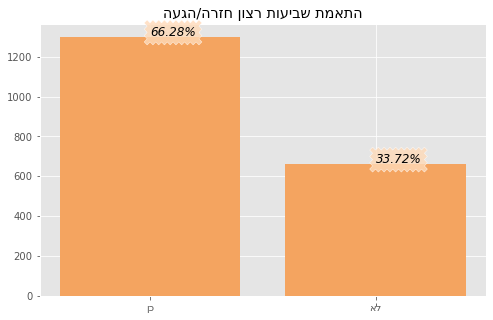

In [24]:
all_plot_nominal(41,'sandybrown','peachpuff')

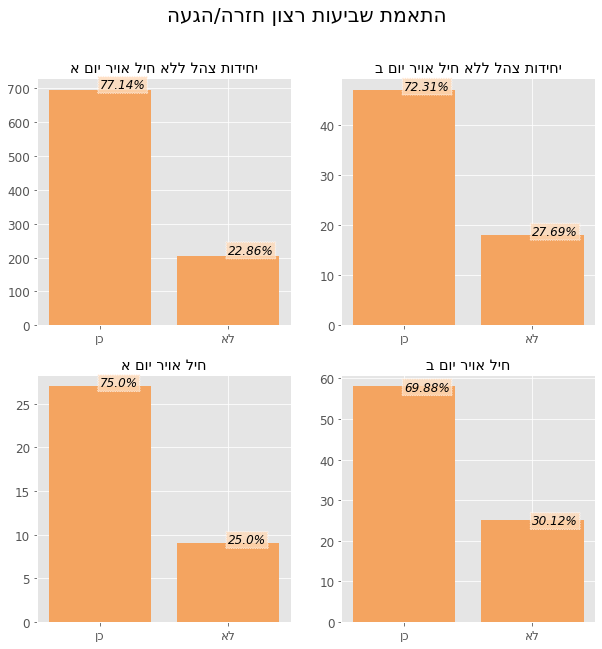

In [25]:
four_plot_nominal(41,'sandybrown','peachpuff')

#  השוואת שביעות רצון 

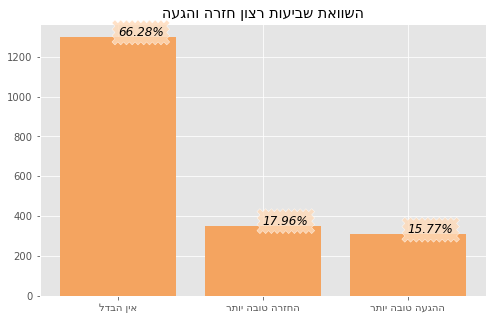

In [70]:
all_plot_nominal(42,'sandybrown','peachpuff')

C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


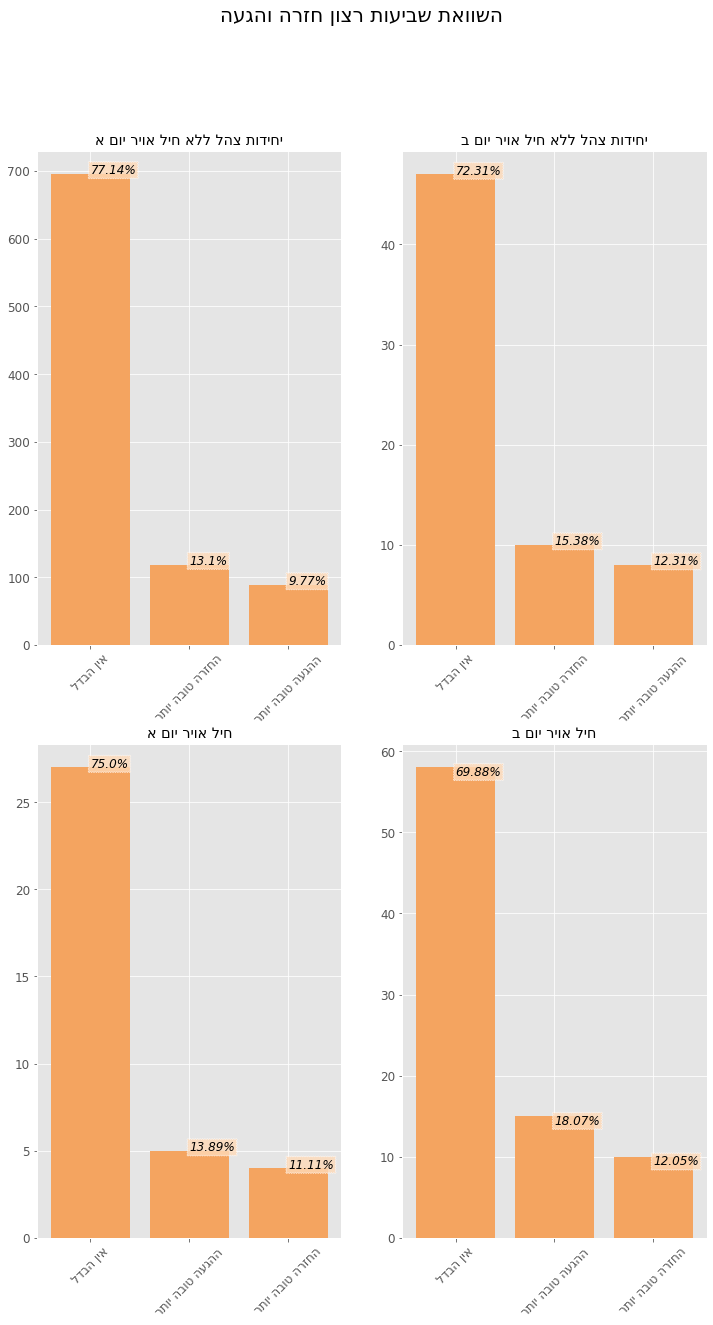

In [69]:
four_plot_nominal2(42,3,20,12,'sandybrown','peachpuff')

#  הצלבה בין שביעות רצון שאט"ל לבין מקום מגורים 

In [28]:
df = all_data.groupby(by = all_data.columns[3]).agg(['count','mean']).iloc[:,8:10]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?  \
                                                                    count   
מהו מקום המגורים שלך?                                                       
ירושלים                                                                39   
חיפה                                                                   25   
פתח תקווה                                                              21   
רמת גן                                                                 20   
באר שבע                                                                16   
מודיעין                                                                16   
ראשון לציון                                                            16   
תל אביב יפו                                                            15   
אשקלון                                                                 12   
כפר סבא                                                                11   

                                  
                            mean  
מהו מקום המגורים שלך?             
ירושלים                 4.256410  
חיפה                    4.160000  
פתח תקווה               4.190476  
רמת גן                  3.800000  
באר שבע                 4.375000  
מודיעין                 4.062500  
ראשון לציון             3.437500  
תל אביב יפו             4.466667  
אשקלון                  3.833333  
כפר סבא                 4.090909

#  הצלבה בין שביעות רצון שאט"ל לבין מקום בסיס 

In [29]:
df = all_data.groupby(by = all_data.columns[4]).agg(['count','mean']).iloc[:,8:10]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?  \
                                                                      count   
מהו הבסיס אליו אתה מגיע?                                                      
בהל"צ                                                                   136   
סיירים                                                                  101   
בא"ח נח"ל טוב                                                            39   
בא"ח צנחנים                                                              26   
בה"ד 1                                                                   20   
דובב                                                                     19   
הר קרן                                                                   16   
שבטה                                                                     15   
שיזפון                                                                   14   
קריית ההדרכה                                                             12   

                                    
                              mean  
מהו הבסיס אליו אתה מגיע?            
בהל"צ                     4.051471  
סיירים                    4.148515  
בא"ח נח"ל טוב             4.487179  
בא"ח צנחנים               4.230769  
בה"ד 1                    3.900000  
דובב                      4.105263  
הר קרן                    3.812500  
שבטה                      4.600000  
שיזפון                    3.785714  
קריית ההדרכה              4.166667

# תדרוך יציאה הביתה

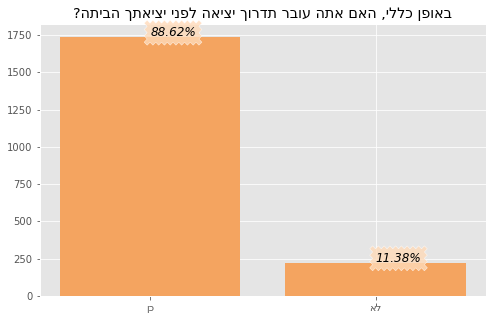

In [30]:
all_plot_nominal(12,'sandybrown','peachpuff')

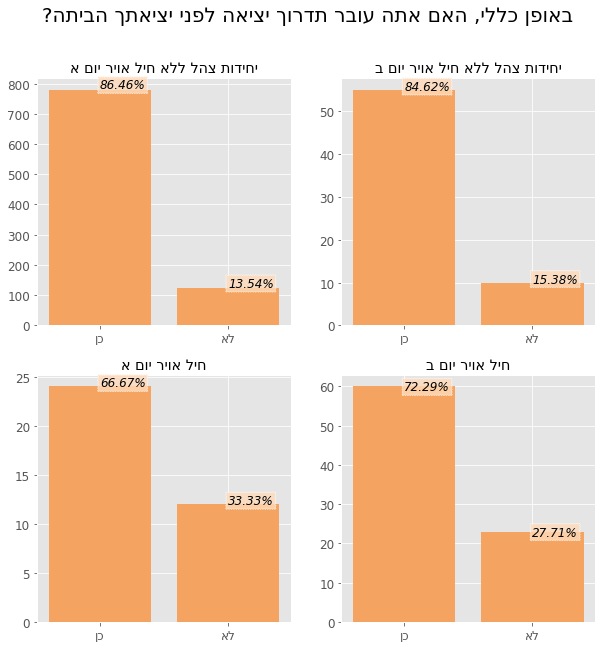

In [31]:
four_plot_nominal(12,'sandybrown','peachpuff')

# סוגי אמצעי תחבורה

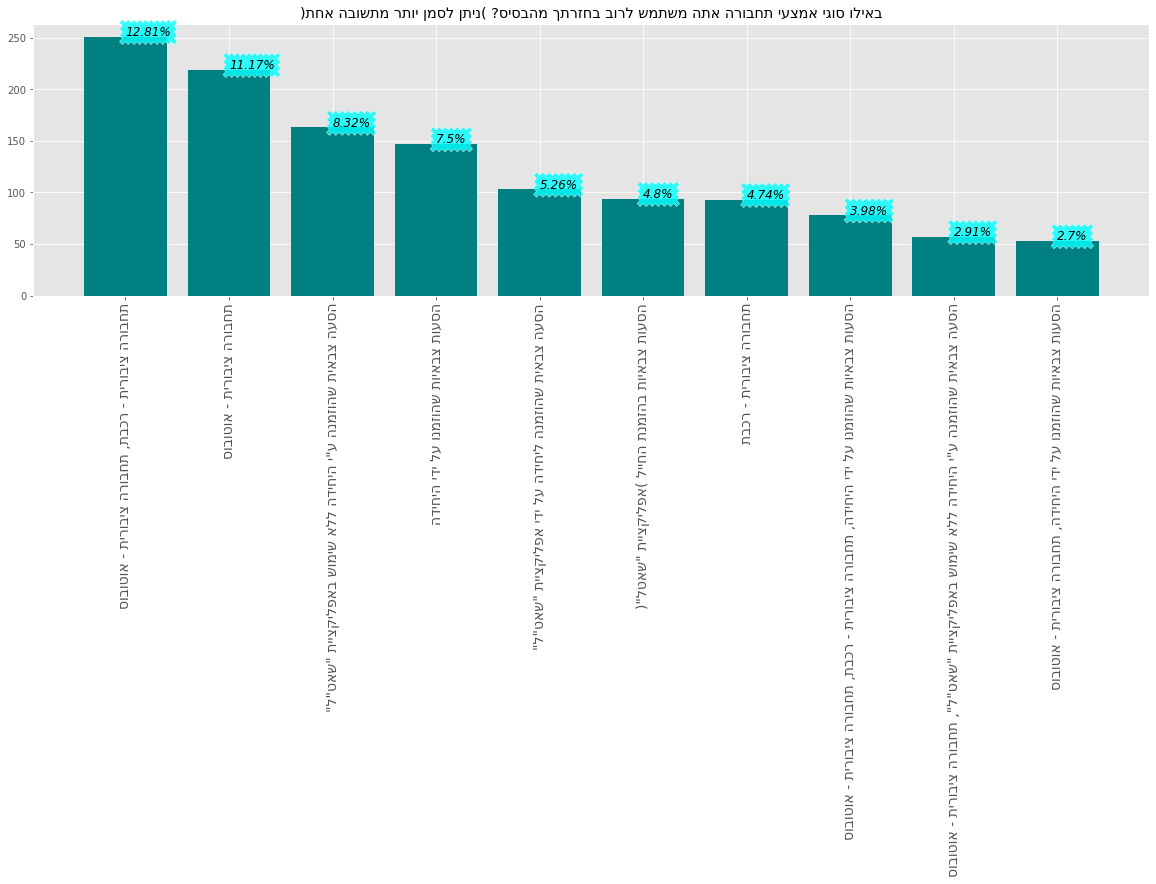

In [32]:
all_plot_nominal3(20,10)

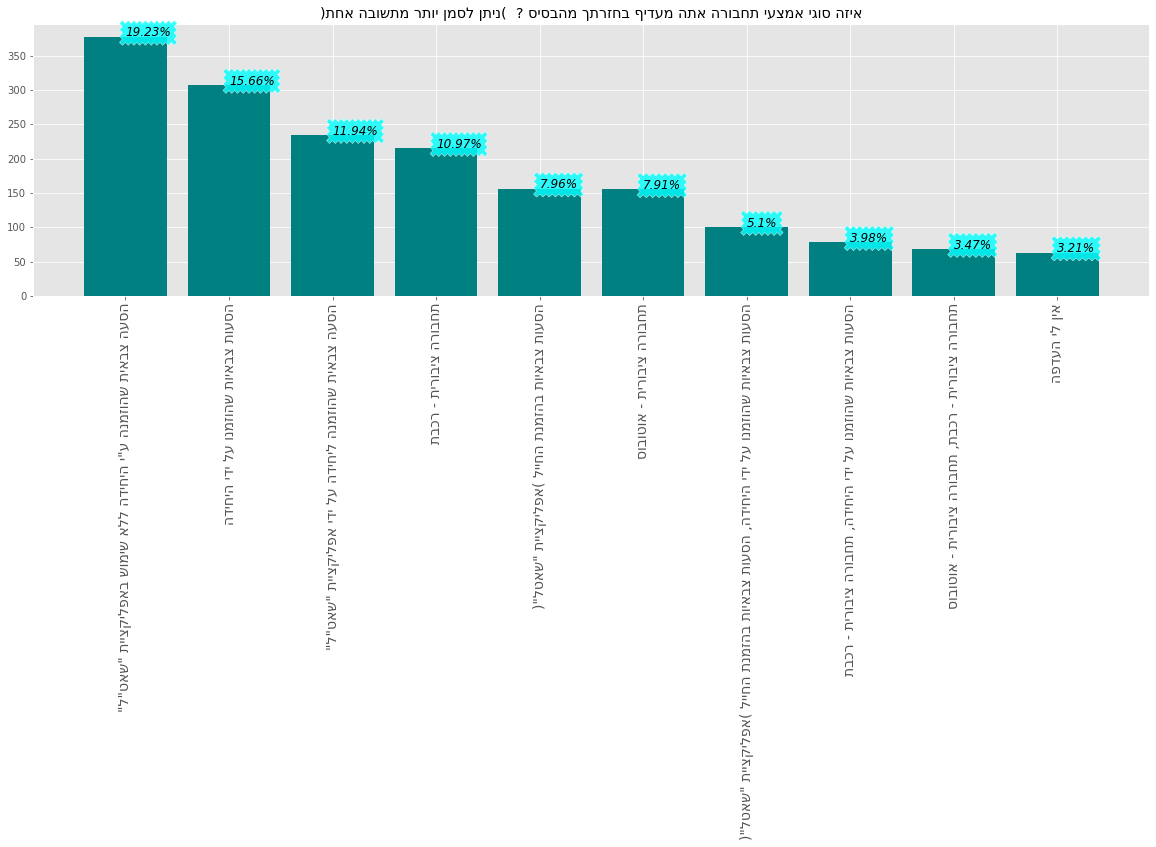

In [33]:
all_plot_nominal3(21,10)

C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


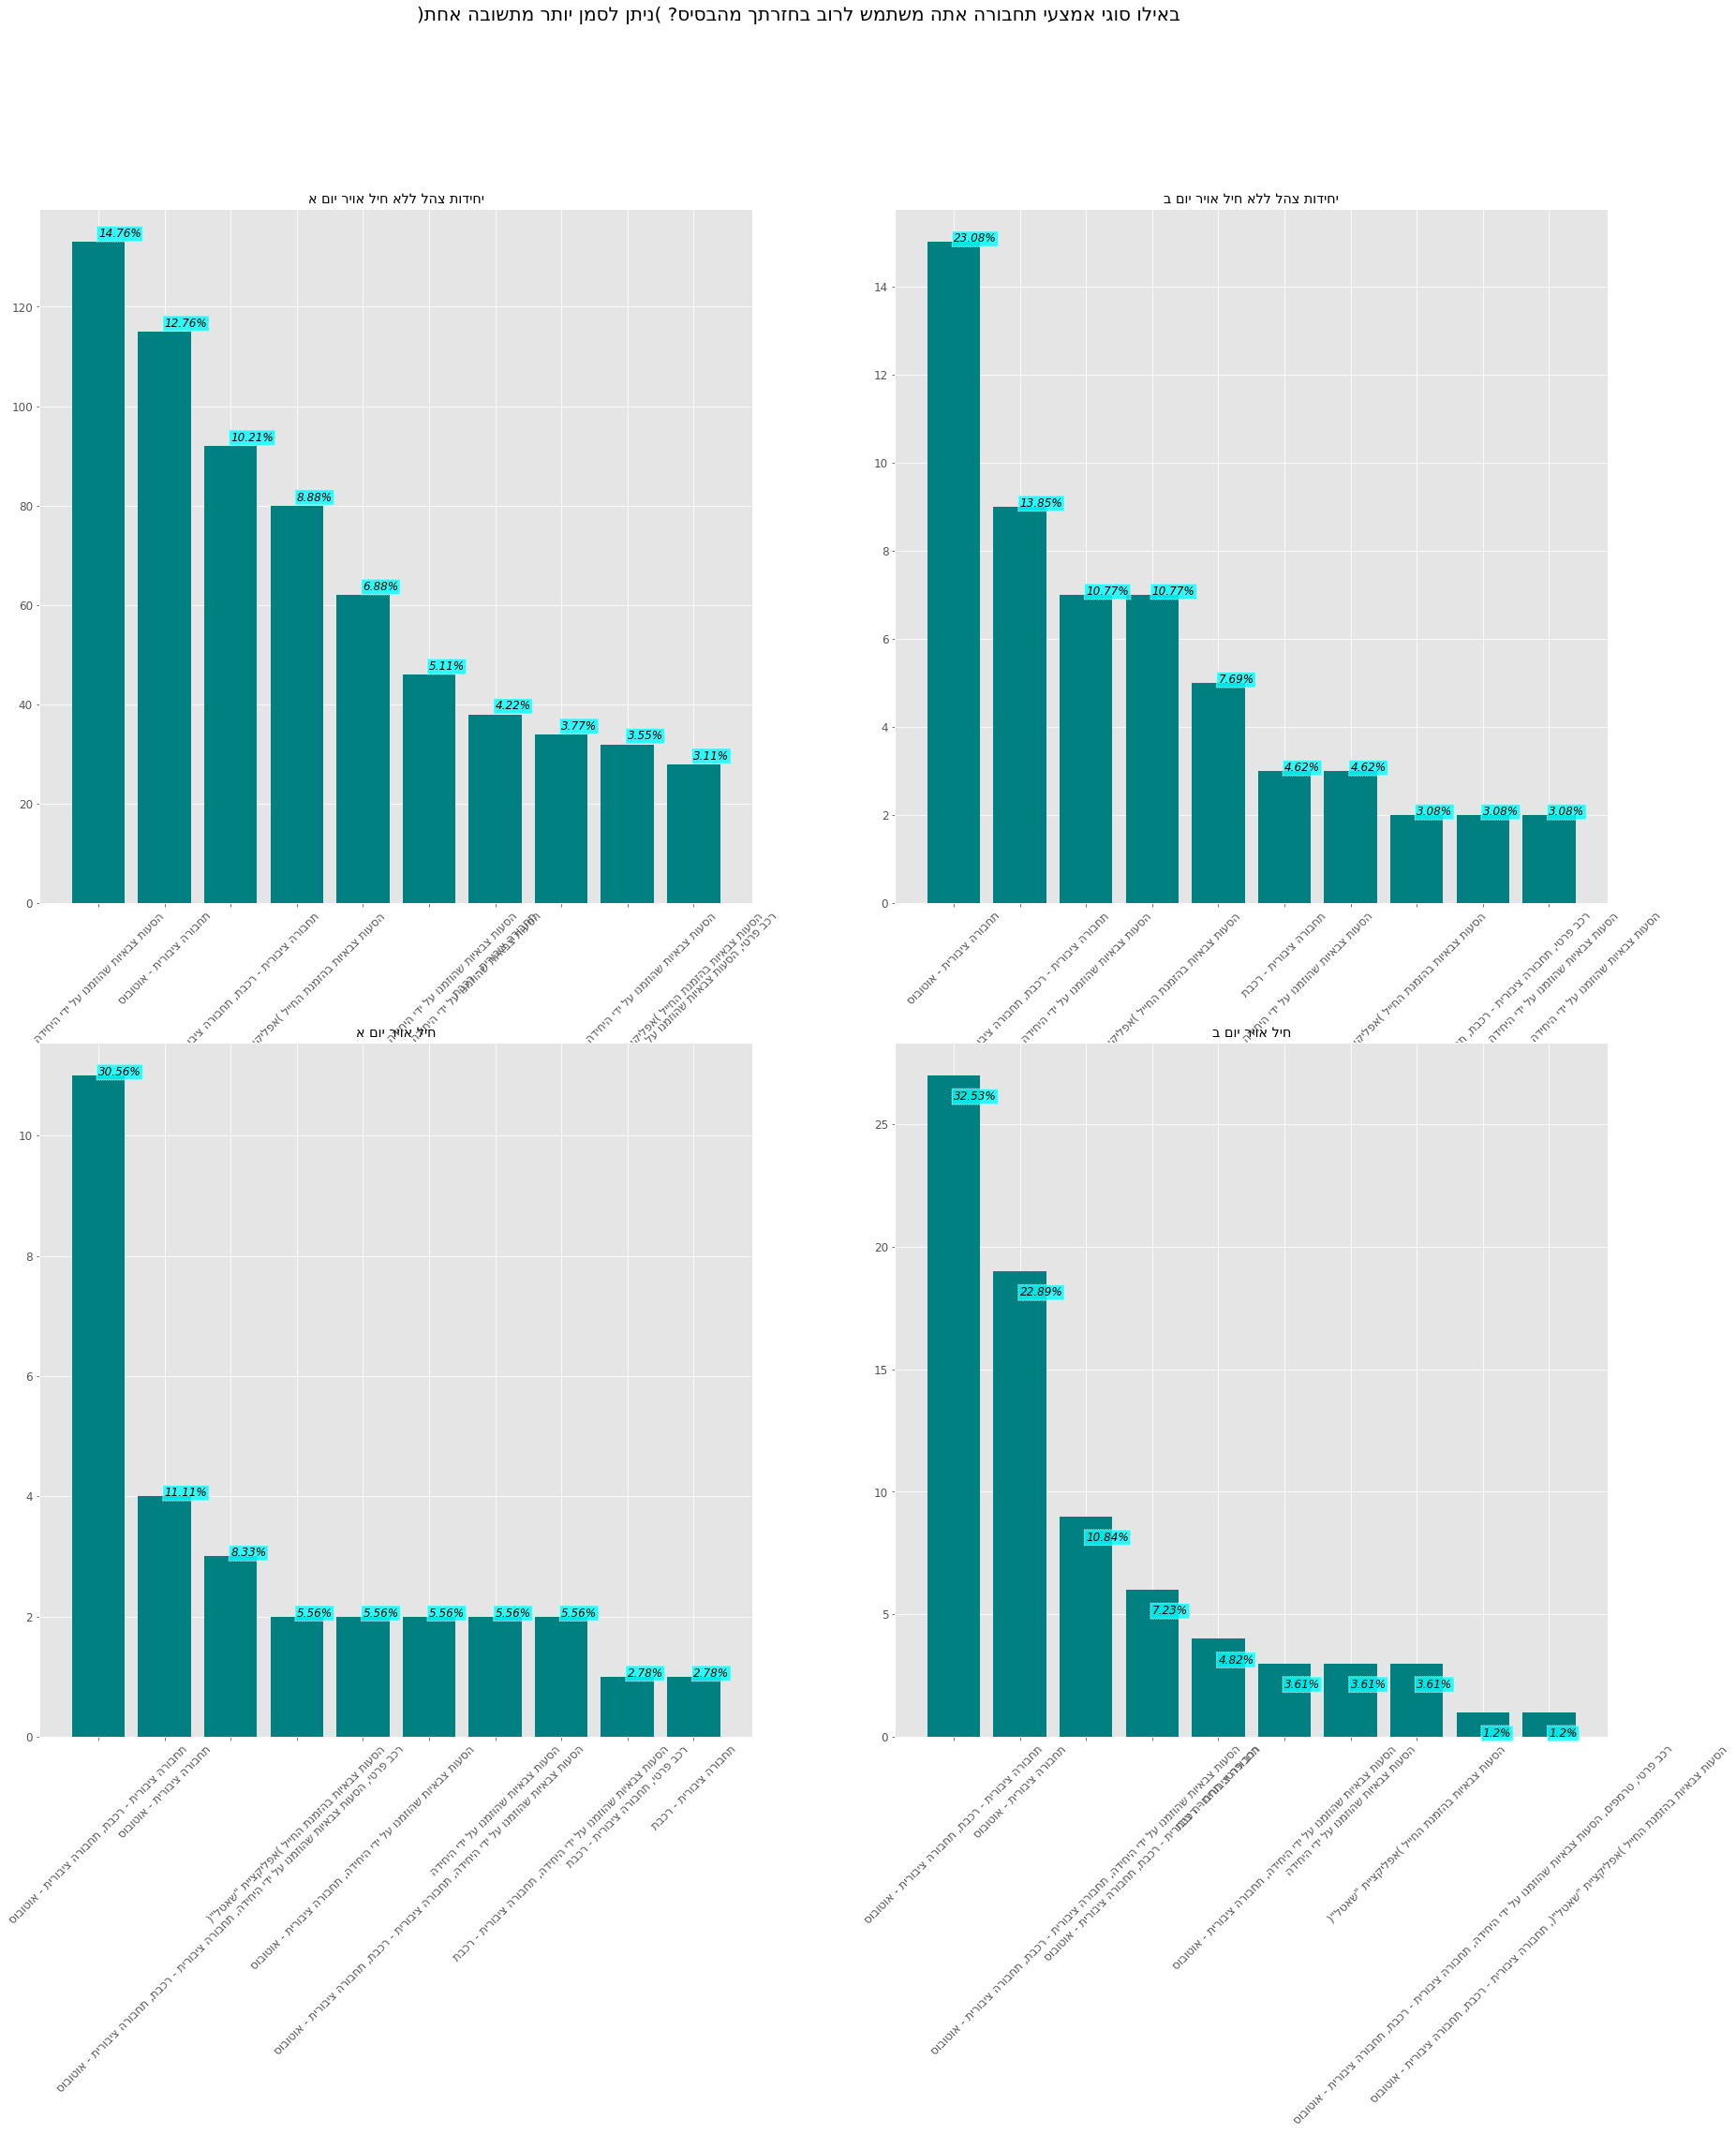

In [34]:
four_plot_nominal2(20,10,30,30)

# אמצעי תחבורה

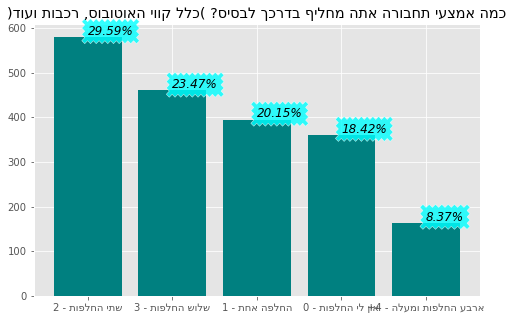

In [35]:
all_plot_nominal(18)

C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29280/2630356933.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


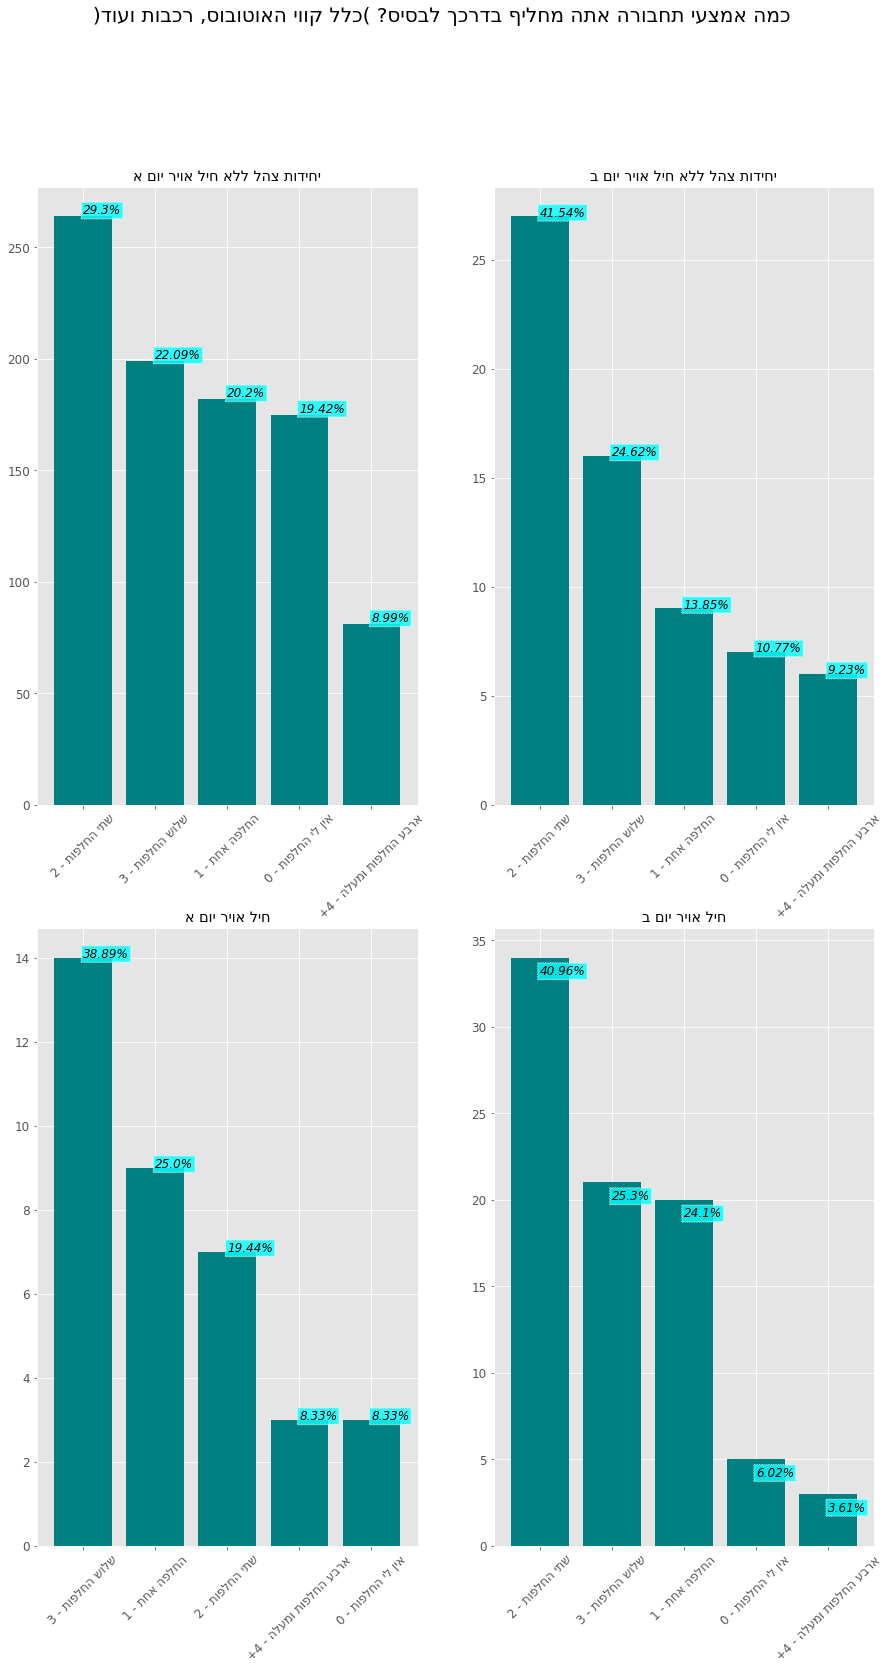

In [36]:
four_plot_nominal2(18,5,25,15)

# הכרה של שאט"ל + שביעות רצון הגעה וחזרה

In [37]:
df = all_data.groupby(by = all_data.columns[23]).agg(['count','mean']).iloc[:,4:8]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מדרך ההגעה שלך לבסיס?  \
                                                                          count   
האם אתה מכיר את אפליקציית "שאטל"?                                                 
כן                                                                         1147   
לא                                                                          807   

                                             \
                                       mean   
האם אתה מכיר את אפליקציית "שאטל"?             
כן                                 3.619006   
לא                                 3.415118   

                                  באיזו מידה הנך שבע רצון מדרך החזרה שלך מהבסיס?  \
                                                                           count   
האם אתה מכיר את אפליקציית "שאטל"?                                                  
כן                                                                          1147   
לא                                                                           807   

                                             
                                       mean  
האם אתה מכיר את אפליקציית "שאטל"?            
כן                                 3.700087  
לא                                 3.456010

# שימוש שאט"ל + שביעות רצון הגעה וחזרה

In [38]:
df = all_data.groupby(by = all_data.columns[24]).agg(['count','mean']).iloc[:,4:8]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מדרך ההגעה שלך לבסיס?  \
                                                                         count   
האם אתה משתמש באפליקציית "שאטל"?                                                 
לא                                                                        1025   
כן                                                                         595   

                                            \
                                      mean   
האם אתה משתמש באפליקציית "שאטל"?             
לא                                3.320976   
כן                                3.875630   

                                 באיזו מידה הנך שבע רצון מדרך החזרה שלך מהבסיס?  \
                                                                          count   
האם אתה משתמש באפליקציית "שאטל"?                                                  
לא                                                                         1025   
כן                                                                          595   

                                            
                                      mean  
האם אתה משתמש באפליקציית "שאטל"?            
לא                                3.402927  
כן                                3.926050

# הורדת שאט"ל שאט"ל + שביעות רצון הגעה וחזרה

In [39]:
df = all_data.groupby(by = all_data.columns[25]).agg(['count','mean']).iloc[:,4:8]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מדרך ההגעה שלך לבסיס?  \
                                                                       count   
האם הורדת את אפליקציית "שאטל"?                                                 
כן                                                                       618   
לא                                                                       584   
הורדתי ומחקתי                                                            137   

                                          \
                                    mean   
האם הורדת את אפליקציית "שאטל"?             
כן                              3.611650   
לא                              3.303082   
הורדתי ומחקתי                   3.182482   

                               באיזו מידה הנך שבע רצון מדרך החזרה שלך מהבסיס?  \
                                                                        count   
האם הורדת את אפליקציית "שאטל"?                                                  
כן                                                                        618   
לא                                                                        584   
הורדתי ומחקתי                                                             137   

                                          
                                    mean  
האם הורדת את אפליקציית "שאטל"?            
כן                              3.757282  
לא                              3.347603  
הורדתי ומחקתי                   3.204380

In [40]:
df = all_data.groupby(by = all_data.columns[28]).agg(['count','mean']).iloc[:,4:8]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מדרך ההגעה שלך לבסיס?  \
                                                                                           count   
באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?                                                 
5.0                                                                                          260   
4.0                                                                                          183   
3.0                                                                                           86   
2.0                                                                                           40   
1.0                                                                                           26   

                                                              \
                                                        mean   
באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?             
5.0                                                 4.307692   
4.0                                                 3.710383   
3.0                                                 3.523256   
2.0                                                 3.025000   
1.0                                                 3.192308   

                                                   באיזו מידה הנך שבע רצון מדרך החזרה שלך מהבסיס?  \
                                                                                            count   
באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?                                                  
5.0                                                                                           260   
4.0                                                                                           183   
3.0                                                                                            86   
2.0                                                                                            40   
1.0                                                                                            26   

                                                              
                                                        mean  
באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?            
5.0                                                 4.373077  
4.0                                                 3.912568  
3.0                                                 3.441860  
2.0                                                 2.725000  
1.0                                                 3.000000

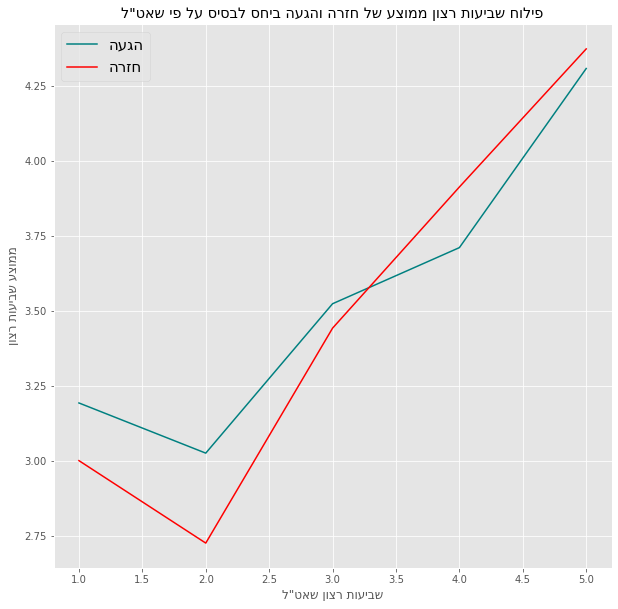

In [41]:
x = df.index.tolist()
y1 = df.iloc[:,1].tolist()
y2 = df.iloc[:,3].tolist()
plt.figure(figsize = (10,10))
plt.plot(x,y1, color = 'teal')
plt.plot(x,y2, color = 'red')
plt.title('פילוח שביעות רצון ממוצע של חזרה והגעה ביחס לבסיס על פי שאט"ל'[::-1])
plt.xlabel('שביעות רצון שאט"ל'[::-1])
plt.ylabel('ממוצע שביעות רצון'[::-1])
plt.legend(labels = ["הגעה"[::-1],"חזרה"[::-1]], fontsize = 15)
plt.show()

# הוגדר הגעה לבסיס

In [42]:
"""
import datetime
plt.figure(figsize = (25,5))
x = pd.to_datetime(all_data.iloc[:,8],format='%H%M%S', errors='ignore')
x = x.value_counts().sort_index()
plt.xticks(rotation = 90)
plt.plot(x)
plt.title(all_data.columns[8][::-1])
plt.axvline(x='07:00:00',linestyle = '--', color = 'teal')
plt.text('08:00:00', 100,'בוקר'[::-1],size=15,style = 'italic',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.axvline(x='09:30:00',linestyle = '--', color = 'teal')
plt.text('10:30:00', 100,'צהריים'[::-1],size=15,style = 'italic',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.axvline(x='12:00:00',linestyle = '--', color = 'teal')
plt.text('13:12:00', 100,'אחר צהריים'[::-1],size=15,style = 'italic',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.axvline(x='16:00:00',linestyle = '--', color = 'teal')
plt.show()
"""

'\nimport datetime\nplt.figure(figsize = (25,5))\nx = pd.to_datetime(all_data.iloc[:,8],format=\'%H%M%S\', errors=\'ignore\')\nx = x.value_counts().sort_index()\nplt.xticks(rotation = 90)\nplt.plot(x)\nplt.title(all_data.columns[8][::-1])\nplt.axvline(x=\'07:00:00\',linestyle = \'--\', color = \'teal\')\nplt.text(\'08:00:00\', 100,\'בוקר\'[::-1],size=15,style = \'italic\',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor=\'white\', boxstyle=\'Sawtooth,pad=0.5\'))\nplt.axvline(x=\'09:30:00\',linestyle = \'--\', color = \'teal\')\nplt.text(\'10:30:00\', 100,\'צהריים\'[::-1],size=15,style = \'italic\',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor=\'white\', boxstyle=\'Sawtooth,pad=0.5\'))\nplt.axvline(x=\'12:00:00\',linestyle = \'--\', color = \'teal\')\nplt.text(\'13:12:00\', 100,\'אחר צהריים\'[::-1],size=15,style = \'italic\',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor=\'white\', boxstyle=\'Sawtooth,pad=0.5\'))\nplt.axvline(x=\'16:00:0

#  מעריך הגעה לבסיס

In [43]:
"""
import datetime
plt.figure(figsize = (25,5))
x = pd.to_datetime(all_data.iloc[:,9],format='%H%M%S', errors='ignore')
x = x.value_counts().sort_index()
plt.xticks(rotation = 90)
plt.plot(x)

plt.axvline(x='07:00:00',linestyle = '--', color = 'teal')
plt.text('08:00:00', 100,'בוקר'[::-1],size=15,style = 'italic',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.axvline(x='09:30:00',linestyle = '--', color = 'teal')
plt.text('10:30:00', 100,'צהריים'[::-1],size=15,style = 'italic',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.axvline(x='12:00:00',linestyle = '--', color = 'teal')
plt.text('12:30:00', 100,'אחר צהריים'[::-1],size=15,style = 'italic',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.axvline(x='16:00:00',linestyle = '--', color = 'teal')
plt.title(all_data.columns[9][::-1])
plt.show()
"""

'\nimport datetime\nplt.figure(figsize = (25,5))\nx = pd.to_datetime(all_data.iloc[:,9],format=\'%H%M%S\', errors=\'ignore\')\nx = x.value_counts().sort_index()\nplt.xticks(rotation = 90)\nplt.plot(x)\n\nplt.axvline(x=\'07:00:00\',linestyle = \'--\', color = \'teal\')\nplt.text(\'08:00:00\', 100,\'בוקר\'[::-1],size=15,style = \'italic\',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor=\'white\', boxstyle=\'Sawtooth,pad=0.5\'))\nplt.axvline(x=\'09:30:00\',linestyle = \'--\', color = \'teal\')\nplt.text(\'10:30:00\', 100,\'צהריים\'[::-1],size=15,style = \'italic\',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor=\'white\', boxstyle=\'Sawtooth,pad=0.5\'))\nplt.axvline(x=\'12:00:00\',linestyle = \'--\', color = \'teal\')\nplt.text(\'12:30:00\', 100,\'אחר צהריים\'[::-1],size=15,style = \'italic\',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor=\'white\', boxstyle=\'Sawtooth,pad=0.5\'))\nplt.axvline(x=\'16:00:00\',linestyle = \'--\', color = \'te

# חלוקת זמן למקום הגעה

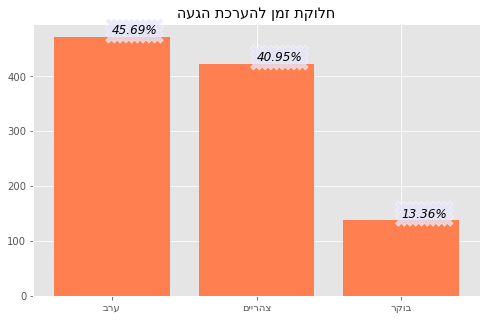

In [44]:
all_plot_nominal(38,plot_color = 'coral',text_color ='lavender')

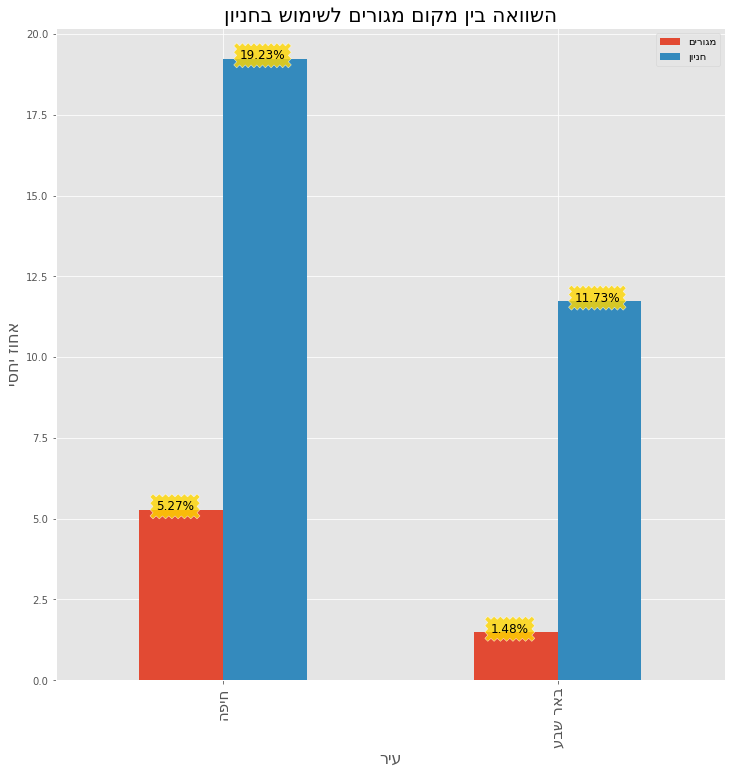

In [66]:

henion = [all_data[all_data.columns[5]].value_counts(normalize = True)["חניון חוף זמיר חיפה"],
           all_data[all_data.columns[5]].value_counts(normalize = True)["תחנה מרכזית באר שבע"]]

megurim = [all_data[all_data.columns[3]].value_counts(normalize = True)["חיפה"],
          all_data[all_data.columns[3]].value_counts(normalize = True)["באר שבע "]]
labels =  [label[::-1] for label in ["חיפה","באר שבע"]]
df = pd.DataFrame({"עיר"[::-1]:labels,"מגורים"[::-1]:[round(r*100,2) for r in megurim],"חניון"[::-1]:[round(r*100,2) for r in henion]})
df.plot(x=df.columns[0], y=df.columns[1:3], kind="bar",figsize = (12,12))
plt.title("השוואה בין מקום מגורים לשימוש בחניון"[::-1], size = 20)
plt.text(0.05,df.iloc[0,2],f"{df.iloc[0,2]}%",size=12,bbox=dict(facecolor="gold",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.text(-0.2,df.iloc[0,1],f"{df.iloc[0,1]}%",size=12,bbox=dict(facecolor="gold",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.text(1.05,df.iloc[1,2],f"{df.iloc[1,2]}%",size=12,bbox=dict(facecolor="gold",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.text(0.8,df.iloc[1,1],f"{df.iloc[1,1]}%",size=12,bbox=dict(facecolor="gold",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.ylabel("אחוז יחסי"[::-1],size =16)
plt.xticks(size = 15)
plt.xlabel(df.columns[0],size =16)

plt.show()

# הצלבה בין ערים לחניונים

In [46]:
megurim_henion = pd.crosstab(all_data[all_data.columns[3]],all_data[all_data.columns[5]])
megurim_henion.columns = [i[::-1] for i in megurim_henion.columns]

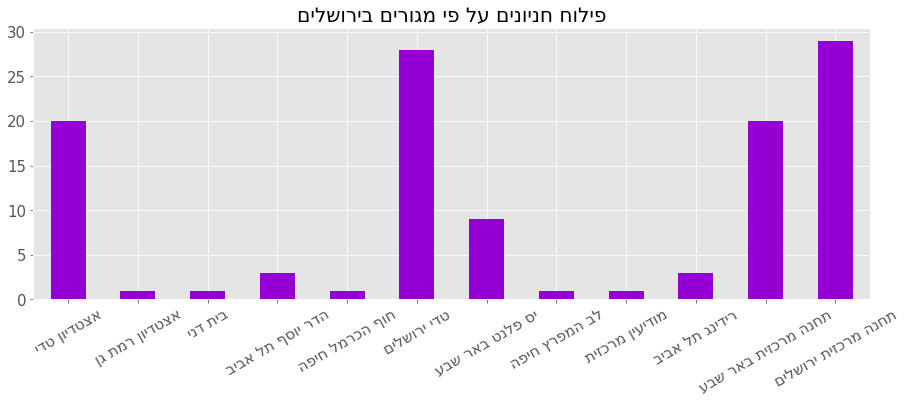

In [47]:
r = "ירושלים"
megurim_henion.loc[r][megurim_henion.loc[r]>0].plot(kind = "bar", figsize = (15,5), color = 'darkviolet')
plt.title(f"פילוח חניונים על פי מגורים ב{r}"[::-1], size = 20)
plt.xticks(size = 15,rotation = 30)
plt.yticks(size = 15)
plt.show()

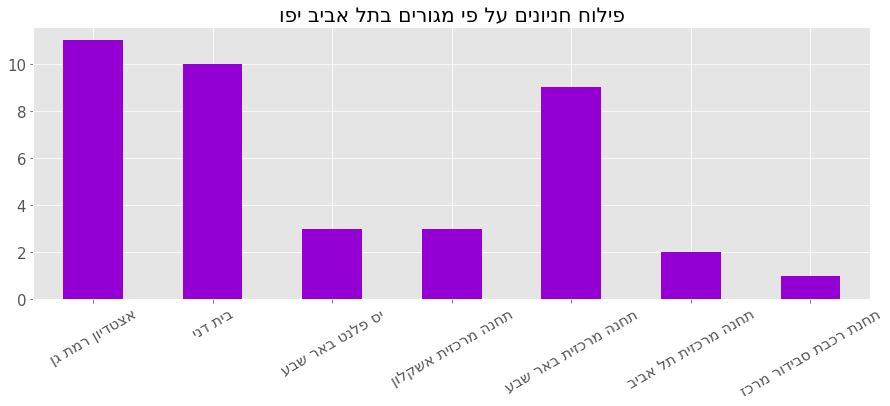

In [48]:
r = "תל אביב יפו"
megurim_henion.loc[r][megurim_henion.loc[r]>0].plot(kind = "bar", figsize = (15,5), color = 'darkviolet')
plt.title(f"פילוח חניונים על פי מגורים ב{r}"[::-1],size = 20)
plt.xticks(size = 15,rotation = 30)
plt.yticks(size = 15)
plt.show()

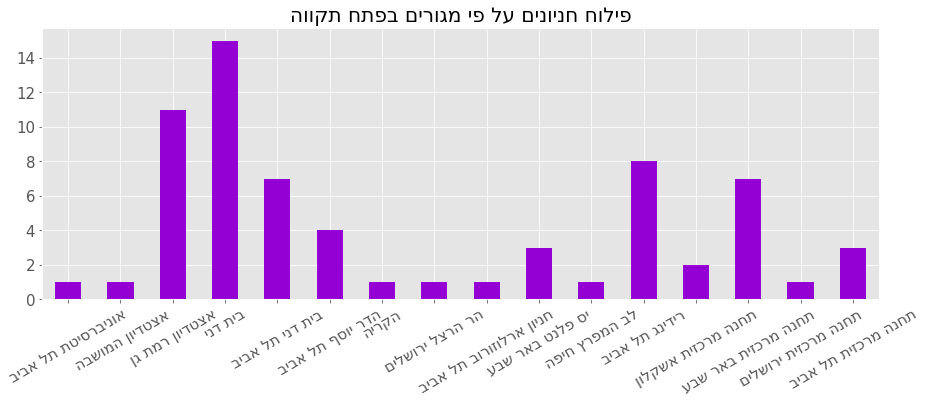

In [49]:
r = "פתח תקווה"
megurim_henion.loc[r][megurim_henion.loc[r]>0].plot(kind = "bar", figsize = (15,5), color = 'darkviolet')
plt.title(f"פילוח חניונים על פי מגורים ב{r}"[::-1],size = 20)
plt.xticks(size = 15,rotation = 30)
plt.yticks(size = 15)
plt.show()

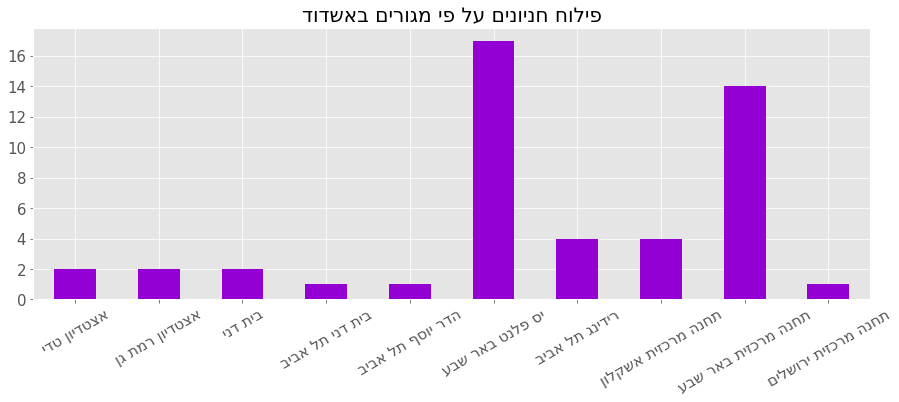

In [50]:
r = "אשדוד"
megurim_henion.loc[r][megurim_henion.loc[r]>0].plot(kind = "bar", figsize = (15,5), color = 'darkviolet')
plt.title(f"פילוח חניונים על פי מגורים ב{r}"[::-1],size = 20)
plt.xticks(size = 15,rotation = 30)
plt.yticks(size = 15)
plt.show()

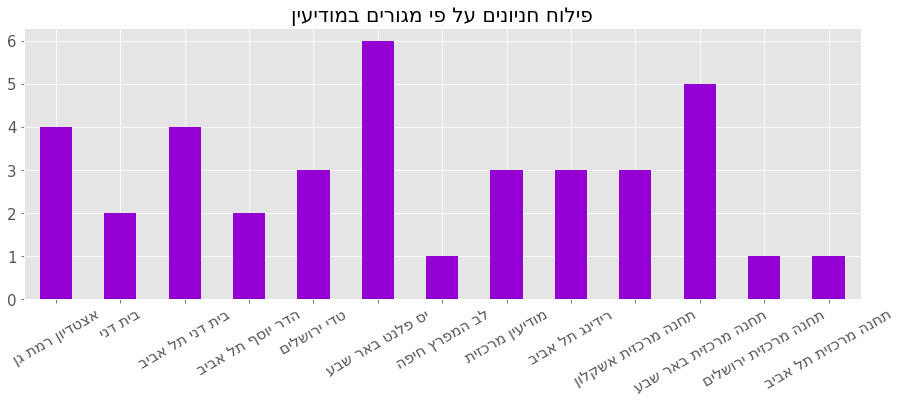

In [51]:
r = "מודיעין"
megurim_henion.loc[r][megurim_henion.loc[r]>0].plot(kind = "bar", figsize = (15,5), color = 'darkviolet')
#for j in range(len(megurim_henion.loc[r][megurim_henion.loc[r]>0].index.tolist())):
    #txt = f"{megurim_henion.loc[r][megurim_henion.loc[r]>0].value_counts()[j]}"
plt.title(f"פילוח חניונים על פי מגורים ב{r}"[::-1],size = 20)
plt.xticks(size = 15,rotation = 30)
plt.yticks(size = 15)
plt.show()

# הצלבה בין מקום מגורים תחנת הסעה סיבת הגעה לתחנת הסעה

In [52]:
df = all_data.groupby(by = [all_data.columns[3],all_data.columns[5]]).agg(['sum']).iloc[:,4:5]
df.to_csv('הצלבה בין מקום מגורים תחנת הסעה סיבת הגעה לתחנת הסעה.csv')

# הצלבה בין מקום מגורים תחנת הסעה סיבת הגעה לכמה אמצעי תחבורה מחליף

In [53]:
df = all_data.groupby(by = [all_data.columns[3],all_data.columns[5],all_data.columns[7]]).agg(['sum']).iloc[:,14:15]
df.to_csv('הצלבה בין מקום מגורים תחנת הסעה סיבת הגעה לכמה אמצעי תחבורה מחליף.csv')

# הצלבה בין תדרוך יציאה להנחיות הגעה

In [54]:
round(pd.crosstab(all_data[all_data.columns[12]],all_data[all_data.columns[13]], margins = True,normalize = True)*100,2)

באופן כללי האם אתה מקבל הנחיות הגעה לבסיס? (בתדרוך היציאה/ בכלל),כן,לא,All
"באופן כללי, האם אתה עובר תדרוך יציאה לפני יציאתך הביתה?",,,
כן,69.10,21.84,90.94
לא,1.89,7.17,9.06
All,70.99,29.01,100.00


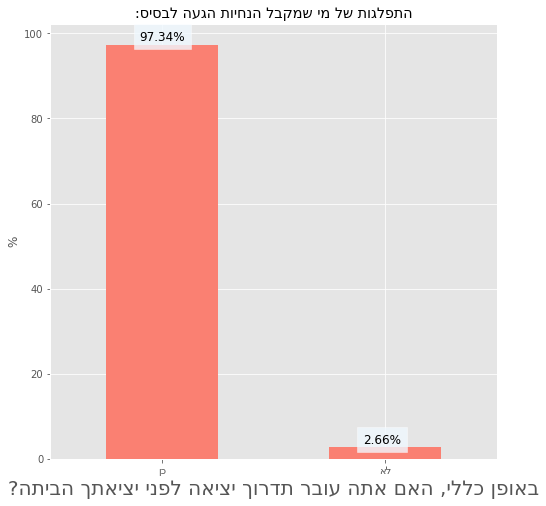

In [55]:
df = round(pd.crosstab(all_data[all_data.columns[12]],all_data[all_data.columns[13]], margins = True,normalize = True)*100,2)

x1 = round(df.iloc[:2,0]/df.iloc[2,0]*100,2)
plt.figure(figsize = (8,8) )
x1.plot(kind = 'bar', color = 'salmon')
title = "התפלגות של מי שמקבל הנחיות הגעה לבסיס:"
plt.xticks(ticks = [0,1], labels = [a[::-1] for a in df.index[:2].tolist()], rotation= 0)
plt.xlabel(f"{df.index.name}"[::-1],size = 20)
plt.ylabel("%")
plt.title(title[::-1])
for i in range(2):
    plt.text(i-0.1,x1[i]+1,f"{x1[i]}%",size=12,bbox=dict(facecolor="aliceblue",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))

plt.show()

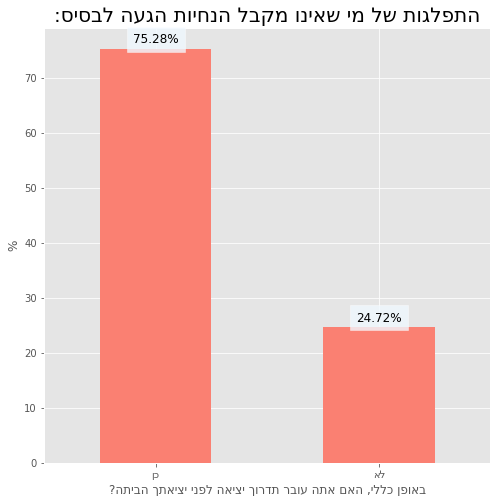

In [56]:
df = round(pd.crosstab(all_data[all_data.columns[12]],all_data[all_data.columns[13]], margins = True,normalize = True)*100,2)

x1 = round(df.iloc[:2,1]/df.iloc[2,1]*100,2)
plt.figure(figsize = (8,8) )
x1.plot(kind = 'bar', color = 'salmon')
title = "התפלגות של מי שאינו מקבל הנחיות הגעה לבסיס:"
plt.xticks(ticks = [0,1], labels = [a[::-1] for a in df.index[:2].tolist()], rotation= 0)
plt.xlabel(f"{df.index.name}"[::-1])
plt.ylabel("%")
plt.title(title[::-1],size = 20)
for i in range(2):
    plt.text(i-0.1,x1[i]+1,f"{x1[i]}%",size=12,bbox=dict(facecolor="aliceblue",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))


plt.show()

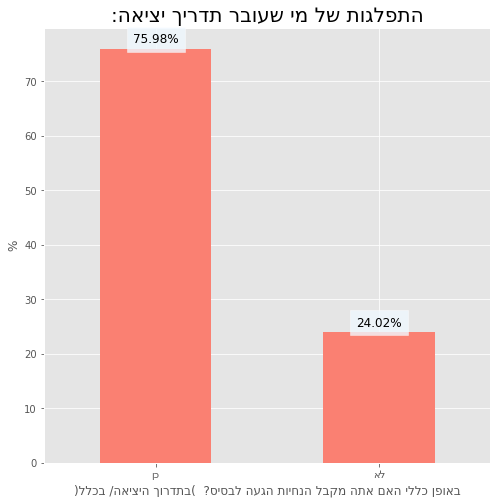

In [57]:
df = round(pd.crosstab(all_data[all_data.columns[12]],all_data[all_data.columns[13]], margins = True,normalize = True)*100,2)

x1 = round(df.iloc[0,:2]/df.iloc[0,2]*100,2)
plt.figure(figsize = (8,8) )
x1.plot(kind = 'bar', color = 'salmon')
title = "התפלגות של מי שעובר תדריך יציאה:"
plt.xticks(ticks = [0,1], labels = [a[::-1] for a in df.index[:2].tolist()], rotation= 0)
plt.xlabel(f"{df.columns.name}"[::-1])
plt.ylabel("%")
plt.title(title[::-1],size = 20)
for i in range(2):
    plt.text(i-0.1,x1[i]+1,f"{x1[i]}%",size=12,bbox=dict(facecolor="aliceblue",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))


plt.show()

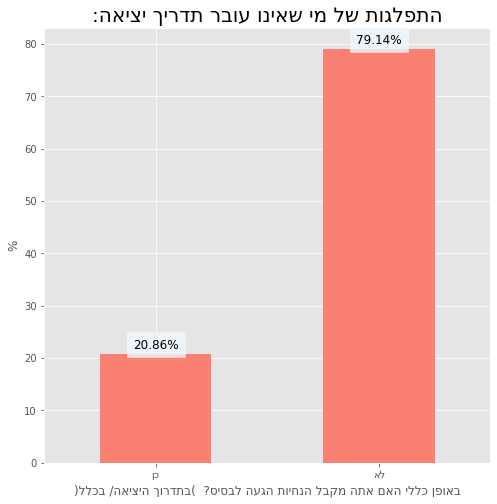

In [58]:
df = round(pd.crosstab(all_data[all_data.columns[12]],all_data[all_data.columns[13]], margins = True,normalize = True)*100,2)

x1 = round(df.iloc[1,:2]/df.iloc[1,2]*100,2)
plt.figure(figsize = (8,8) )
x1.plot(kind = 'bar', color = 'salmon')
title = "התפלגות של מי שאינו עובר תדריך יציאה:"
plt.xticks(ticks = [0,1], labels = [a[::-1] for a in df.index[:2].tolist()], rotation= 0)
plt.xlabel(f"{df.columns.name}"[::-1])
plt.ylabel("%")
plt.title(title[::-1],size = 20)
for i in range(2):
    plt.text(i-0.1,x1[i]+1,f"{x1[i]}%",size=12,bbox=dict(facecolor="aliceblue",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))


plt.show()

# הצלבה בין כמה מכירים שאט"ל כמה הורידו וכמה משתמשים
גרף של שלושתם

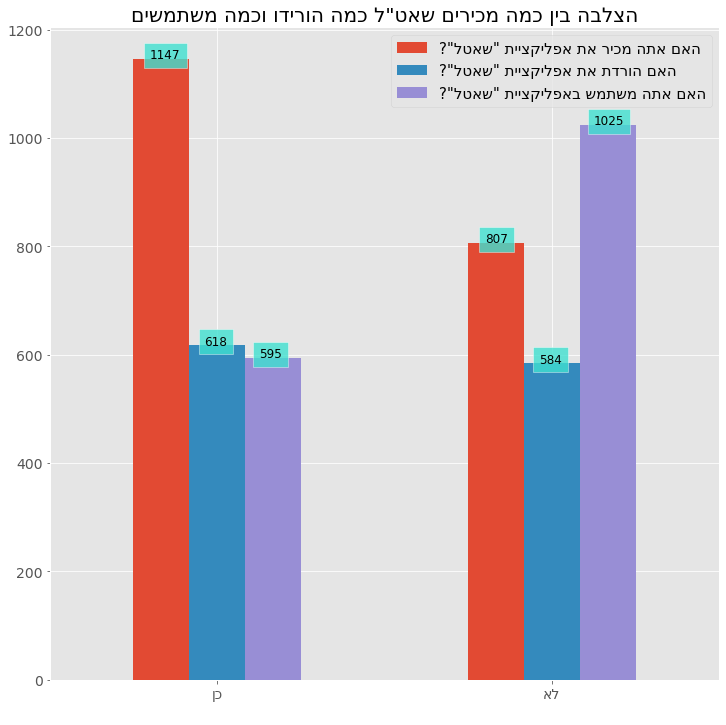

In [59]:
y = all_data[all_data.columns[23]].value_counts().sort_index().index.tolist()[:2]
x1 = all_data[all_data.columns[23]].value_counts().sort_index().tolist()[:2]
x2 = all_data[all_data.columns[24]].value_counts().sort_index().tolist()[:2]
x3 = all_data[all_data.columns[25]].value_counts().sort_index().tolist()[1:3]

df = pd.DataFrame({"כן/לא"[::-1]:[label[::-1] for label in y],all_data.columns[23][::-1]:x1,all_data.columns[24][::-1]:x2,all_data.columns[25][::-1]:x3})
df.plot(x=df.columns[0], y=[df.columns[1],df.columns[3],df.columns[2]], kind="bar",figsize = (12,12))
plt.xticks(rotation = 0, size = 12)
title = 'הצלבה בין כמה מכירים שאט"ל כמה הורידו וכמה משתמשים'
plt.title(title[::-1], size= 20)
plt.legend(fontsize = 15)
#plt.text(-0.2,650,"*הורידו ומחקו: 17"[::-1], fontsize = 20)
plt.text(0.125,df.iloc[0,2],f"{df.iloc[0,2]}",size=12,bbox=dict(facecolor="turquoise",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))
plt.text(-0.0375,df.iloc[0,3],f"{df.iloc[0,3]}",size=12,bbox=dict(facecolor="turquoise",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))
plt.text(-0.2,df.iloc[0,1],f"{df.iloc[0,1]}",size=12,bbox=dict(facecolor="turquoise",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))

plt.text(1.125,df.iloc[1,2],f"{df.iloc[1,2]}",size=12,bbox=dict(facecolor="turquoise",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))
plt.text(-0.0375 + 1,df.iloc[1,3],f"{df.iloc[1,3]}",size=12,bbox=dict(facecolor="turquoise",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))
plt.text(-0.2 + 1,df.iloc[1,1],f"{df.iloc[1,1]}",size=12,bbox=dict(facecolor="turquoise",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.xlabel(' ')
plt.show()

# תדירות שימוש

In [60]:
round(pd.crosstab(all_data[all_data.columns[29]],all_data[all_data.columns[24]],normalize = True)*100,2)

"האם אתה משתמש באפליקציית ""שאטל""?",כן
באיזו תדירות אתה משתמש באפליקצייה?,
1.0,5.88
2.0,8.07
3.0,20.00
4.0,21.68
5.0,44.37


In [61]:
from random import randint as ri
from itertools import chain
from collections import Counter
l = [a.split(",") for a in all_data.iloc[:,7]]
flatten_list = list(chain.from_iterable(l))
Data = dict(Counter(flatten_list))
Data = {k: Data[k] for k in sorted(Data, key=Data.get, reverse=True)[:15]}
#מהירה
Data[list(Data.keys())[1]] = Data[list(Data.keys())[1]] + Data[list(Data.keys())[6]]
#נוחה
Data[list(Data.keys())[2]] = Data[list(Data.keys())[2]] + Data[list(Data.keys())[4]]
#קרובה
Data[list(Data.keys())[3]] = Data[list(Data.keys())[3]] + Data[list(Data.keys())[5]]
#איני מכיר
Data[list(Data.keys())[7]] = Data[list(Data.keys())[7]] + Data[list(Data.keys())[8]]

Data = {k: Data[k] for k in list(Data.keys())[0:1] + list(Data.keys())[1:3]+ list(Data.keys())[3:4] + list(Data.keys())[7:9]}
Data

{'הונחיתי על ידי מפקדיי': 1037,
 'זו הדרך המהירה ביותר עבורי': 534,
 ' זו הדרך הנוחה ביותר עבורי': 504,
 ' זוהי התחנה הקרובה ביותר עבורי': 458,
 'איני מכיר דרכים אחרות להגיע': 121,
 ' איני מכיר דרכים אחרות להגיע': 58}

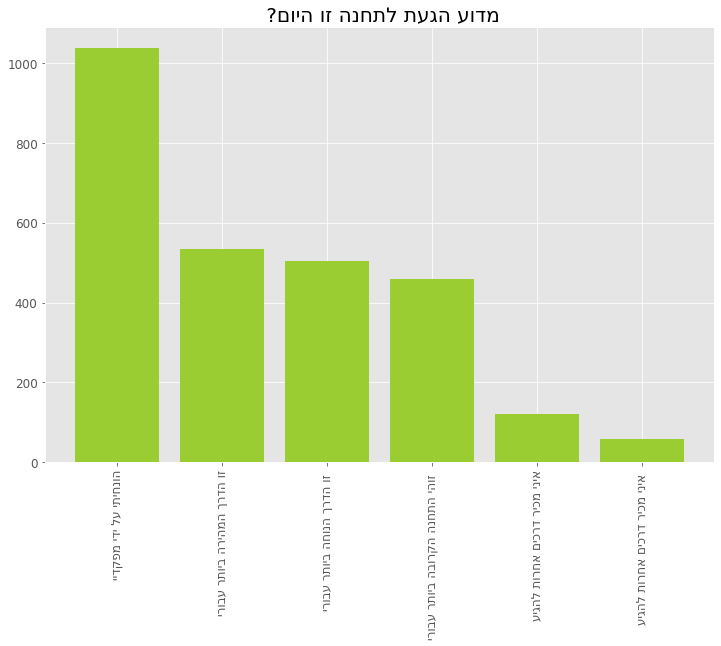

In [62]:
plt.figure(figsize  = (12,8) )
plt.bar([a[::-1] for a in Data.keys()],Data.values(), color = 'yellowgreen')
plt.title(f"{all_data.columns[7][24::-1]}", size=  20)
plt.xticks(rotation = 90,size = 12)
plt.yticks(size = 12)
plt.show()

In [63]:
l = [a.split(",") for a in all_data.iloc[:,20]]
flatten_list = list(chain.from_iterable(l))
Data = dict(Counter(flatten_list))
Data = {k: Data[k] for k in sorted(Data, key=Data.get, reverse=True)}
#אוטובוס
Data[list(Data.keys())[0]] = Data[list(Data.keys())[0]] + Data[list(Data.keys())[6]]
#יחידה
Data[list(Data.keys())[1]] = Data[list(Data.keys())[1]] + Data[list(Data.keys())[8]]
#רכבת
Data[list(Data.keys())[2]] = Data[list(Data.keys())[2]] + Data[list(Data.keys())[3]]
#שאטל
Data[list(Data.keys())[5]] = Data[list(Data.keys())[5]] + Data[list(Data.keys())[7]]
#טרמפים
Data[list(Data.keys())[9]] = Data[list(Data.keys())[9]] + Data[list(Data.keys())[11]]

#אחר
Data[list(Data.keys())[10]] = Data[list(Data.keys())[10]] + Data[list(Data.keys())[12]]

Data = {k: Data[k] for k in list(Data.keys())[0:3] + list(Data.keys())[5:6]+ list(Data.keys())[9:11]}
Data    

{' תחבורה ציבורית - אוטובוס': 1041,
 ' תחבורה ציבורית - רכבת': 576,
 'הסעות צבאיות שהוזמנו על ידי היחידה': 739,
 'רכב פרטי': 480,
 ' הסעות צבאיות בהזמנת החייל (אפליקציית "שאטל")': 188,
 ' הסעות צבאיות שהוזמנו על ידי היחידה': 162}

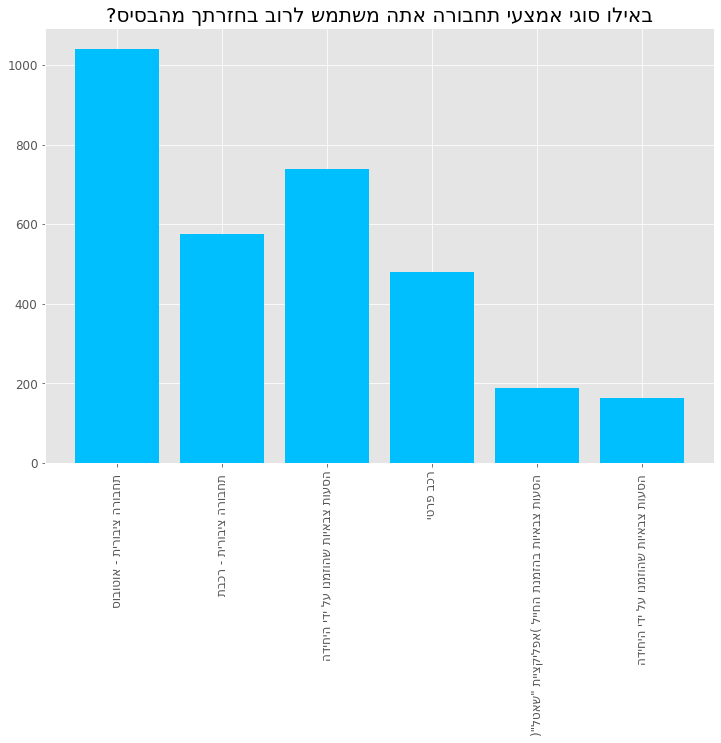

In [64]:
plt.figure(figsize  = (12,8) )
plt.bar([a[::-1] for a in Data.keys()],Data.values(), color = 'deepskyblue')
plt.title(all_data.columns[20][52::-1], size=  20)
plt.xticks(rotation = 90,size = 12)
plt.yticks(size = 12)

plt.show()